In [654]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Análisis de tiempo de extracción por modelo de lenguaje
import seaborn as sns

In [655]:
data_path = "data/formalizacion_data.csv"

data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
data_head = data.iloc[0:6]
data_head.style

,pdf,mm_yyyy,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time
0,BOE-B-2016-1394.pdf,01-2016,Prosegur España S.L.,1497980.000000,euros,Universidad de Vigo,Servicios,Ordinaria,Abierto,phi3,224.870000
1,BOE-B-2016-1121.pdf,01-2016,Eulen S.A.,873120.000000,euros,Universidad de Las Palmas de Gran Canaria,Servicio,Ordinaria,Abierto,phi3,236.110000
2,BOE-B-2016-2353.pdf,01-2016,OHL Servicios Ingesan S.A.,2190696.770000,euros,Hospital Clínic de Barcelona,Servicios,Ordinaria,Abierto,phi3,210.220000
3,BOE-B-2016-1614.pdf,01-2016,Omfe S.A.; Fresenius Kabi España S.A.U.; Laboratorios Salvat S.A. y Meda Pharma S.A.,353.978000,euros,Organismo Autónomo Madrid Salud,Suministro,Ordinaria,Abierto,phi3,298.650000
4,BOE-B-2016-2205.pdf,01-2016,MDL Distribución Logística S.A.,621000.000000,EUR,Instituto Nacional de la Seguridad Social,Servicios,Ordinaria,Abierto,phi3,224.160000
5,BOE-B-2016-2509.pdf,01-2016,ACSA S.A. - S.A. Agricultores de la Vega de Valencia - Depuración de Aguas del Mediterráneo S.L.,348320.220000,euros,Agencia Catalana del Agua,Servicios,Ordinaria,Abierto,phi3,260.920000


In [656]:
# Display columns and dimensions of the dataset
print(f"Columns are: {data.columns}")
print(f"Number of rows is: {data.shape[0]} and number of columns is: {data.shape[1]}")

# Average time of extraction by language model and in total
print(data.groupby("model")["time"].mean())
print(data["time"].mean())

Columns are: Index(['pdf', 'mm_yyyy', 'company', 'amount', 'currency', 'adjudicadora',
       'tipo', 'tramitacion', 'procedimiento', 'model', 'time'],
      dtype='object')
Number of rows is: 400 and number of columns is: 11
model
phi3    257.71305
Name: time, dtype: float64
257.71305


Avarage time of data extraction is 325 seconds aprox so 300 files would take 27 hours aprox.

In [657]:
# Find `nan` values in the dataset
nan_values = data.isnull().sum()
print(nan_values)

pdf               0
mm_yyyy           0
company           3
amount            1
currency          2
adjudicadora      8
tipo              0
tramitacion      38
procedimiento    38
model             0
time              0
dtype: int64


## Data Cleaning and Preparation

In [658]:
# Replace 'None' with NaN
data.replace('None', pd.NA, inplace=True)

# 8 first rows of the dataset
data_head = data.iloc[0:8]
data_head.style

,pdf,mm_yyyy,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time
0,BOE-B-2016-1394.pdf,01-2016,Prosegur España S.L.,1497980.000000,euros,Universidad de Vigo,Servicios,Ordinaria,Abierto,phi3,224.870000
1,BOE-B-2016-1121.pdf,01-2016,Eulen S.A.,873120.000000,euros,Universidad de Las Palmas de Gran Canaria,Servicio,Ordinaria,Abierto,phi3,236.110000
2,BOE-B-2016-2353.pdf,01-2016,OHL Servicios Ingesan S.A.,2190696.770000,euros,Hospital Clínic de Barcelona,Servicios,Ordinaria,Abierto,phi3,210.220000
3,BOE-B-2016-1614.pdf,01-2016,Omfe S.A.; Fresenius Kabi España S.A.U.; Laboratorios Salvat S.A. y Meda Pharma S.A.,353.978000,euros,Organismo Autónomo Madrid Salud,Suministro,Ordinaria,Abierto,phi3,298.650000
4,BOE-B-2016-2205.pdf,01-2016,MDL Distribución Logística S.A.,621000.000000,EUR,Instituto Nacional de la Seguridad Social,Servicios,Ordinaria,Abierto,phi3,224.160000
5,BOE-B-2016-2509.pdf,01-2016,ACSA S.A. - S.A. Agricultores de la Vega de Valencia - Depuración de Aguas del Mediterráneo S.L.,348320.220000,euros,Agencia Catalana del Agua,Servicios,Ordinaria,Abierto,phi3,260.920000
6,BOE-B-2016-391.pdf,01-2016,Sabico Seguridad S.A.,285000.000000,euros,Dirección Provincial de la Tesorería General de la Seguridad Social de Asturias,Servicios,Ordinaria,Abierto,phi3,225.270000
7,BOE-B-2016-871.pdf,01-2016,S.S. Hard Sociedad Limitada,295000.000000,euros,Dirección de Gestión Económica y Recursos Generales,Suministro,Ordinaria,Abierto,phi3,234.240000


In [659]:
# Drop rows where 'amount' is NaN
cleaned_data = data.dropna(subset=['amount'])

# Convert 'amount' and 'time' to numeric
cleaned_data['amount'] = pd.to_numeric(cleaned_data['amount'], errors='coerce')
cleaned_data['time'] = pd.to_numeric(cleaned_data['time'], errors='coerce')

# Convert 'mm_yyyy' to datetime
cleaned_data['mm_yyyy'] = pd.to_datetime(cleaned_data['mm_yyyy'], format='%m-%Y', errors='coerce')

# Checking the cleaned data
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 0 to 399
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   pdf            399 non-null    object        
 1   mm_yyyy        399 non-null    datetime64[ns]
 2   company        396 non-null    object        
 3   amount         399 non-null    float64       
 4   currency       398 non-null    object        
 5   adjudicadora   391 non-null    object        
 6   tipo           399 non-null    object        
 7   tramitacion    361 non-null    object        
 8   procedimiento  361 non-null    object        
 9   model          399 non-null    object        
 10  time           399 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 37.4+ KB


/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_1655/2451150782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['amount'] = pd.to_numeric(cleaned_data['amount'], errors='coerce')
/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_1655/2451150782.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['time'] = pd.to_numeric(cleaned_data['time'], errors='coerce')
/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_1655/2451150782.py:9: SettingWithCopyWarnin

The data has been cleaned and prepared as follows:

- Missing values represented as 'None' have been replaced with NaN.
- Rows with NaN values in the amount field have been removed.
- amount and time columns have been converted to numeric.
- mm_yyyy has been converted to a datetime format.

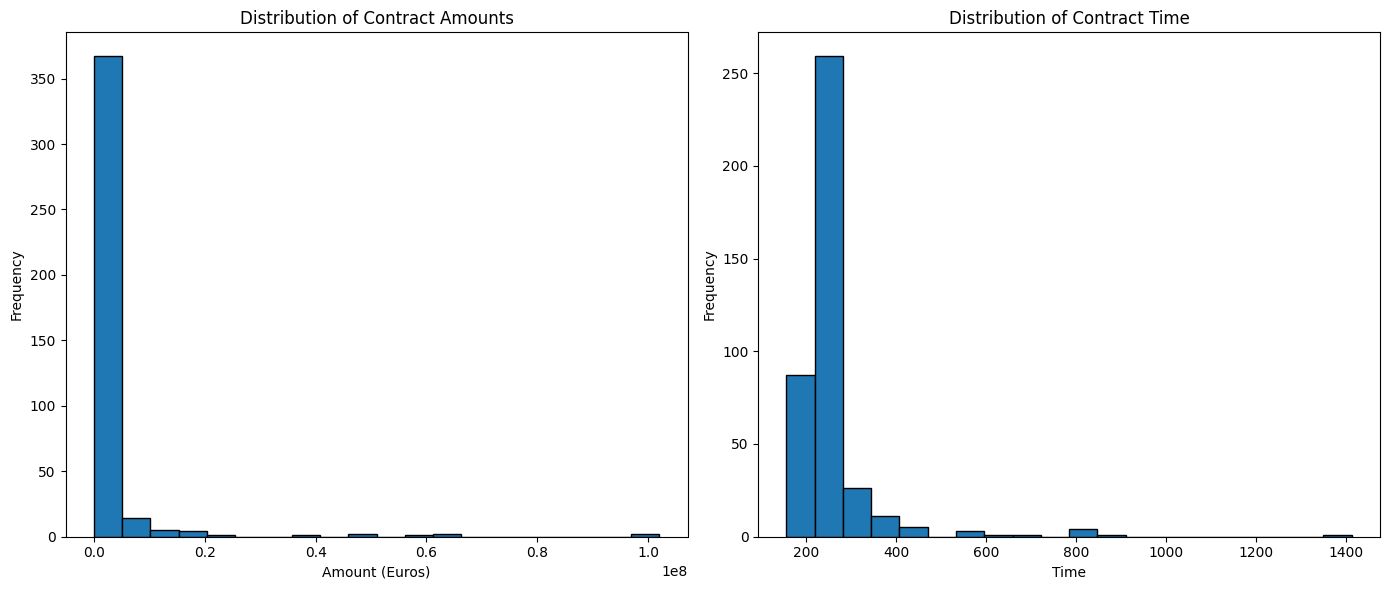

             amount         time
count  3.990000e+02   399.000000
mean   2.656762e+06   257.204511
std    9.885912e+06   105.921996
min    0.000000e+00   155.930000
25%    2.442179e+05   221.630000
50%    4.823916e+05   234.800000
75%    1.195336e+06   255.850000
max    1.020000e+08  1412.890000


In [660]:
# Descriptive statistics
import matplotlib.pyplot as plt

# Summary statistics for numerical fields
summary_stats = cleaned_data[['amount', 'time']].describe()

# Visualizing distributions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Distribution of 'amount'
axes[0].hist(cleaned_data['amount'], bins=20, edgecolor='black')
axes[0].set_title('Distribution of Contract Amounts')
axes[0].set_xlabel('Amount (Euros)')
axes[0].set_ylabel('Frequency')

# Distribution of 'time'
axes[1].hist(cleaned_data['time'], bins=20, edgecolor='black')
axes[1].set_title('Distribution of Contract Time')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display summary statistics
print(summary_stats)


- Amount:

    - Mean: The average contract amount is approximately 25.6 million euros.
    - Standard Deviation: There is a high variability in the contract amounts, as indicated by the standard deviation.
    - Minimum and Maximum values indicate the range of contract amounts.
- Time:

    - Mean: The average time is approximately 331 units.
    - Standard Deviation: There is a significant spread in the time data as well.
    - Minimum and Maximum values indicate the range of contract time.

### Valid values in types

In [661]:
# Different values in tipo
print(cleaned_data['tipo'].value_counts())

tipo
Suministro                                  160
Servicios                                   126
Servicio                                     50
Obras                                        25
Suministros                                  16
Contrato de servicios                         4
Contrato de obras                             3
Contrato de Servicios                         3
Gestión de servicio público                   2
Gestión de Servicios Públicos                 1
Ordinario                                     1
Obra                                          1
Contrato administrativo de servicio           1
Administrativo de servicio                    1
Contrato privado                              1
Administrativo                                1
Suministro sucesivo y continuado              1
Privado                                       1
Concesión del servicio público educativo      1
Name: count, dtype: int64


The following types do not make sense according to the law 9/2017:

- Ordinario
- Administrativo de servicio
- Contrato privado
- Administrativo
- Suministro sucesivo y continuado
- Privado

In [662]:
contract_mapping = {
    'Suministro': 'Contrato de Suministros',
    'Servicios': 'Contrato de Servicios',
    'Servicio': 'Contrato de Servicios',
    'Obras': 'Contrato de Obras',
    'Suministros': 'Contrato de Suministros',
    'Contrato de servicios': 'Contrato de Servicios',
    'Contrato de obras': 'Contrato de Obras',
    'Contrato de Servicios': 'Contrato de Servicios',
    'Gestión de servicio público': None,
    'Gestión de Servicios Públicos': None,
    'Ordinario': None,  # No es un tipo de contrato
    'Obra': 'Contrato de Obras',
    'Contrato administrativo de servicio': None,
    'Administrativo de servicio': None,  # No es un tipo de contrato, aunque luce de servicios
    'Contrato privado': None,  # No aplica a contratos del sector público
    'Administrativo': None,  # No específico
    'Suministro sucesivo y continuado': None, # No es un tipo de contrato
    'Privado': None,  # No aplica a contratos del sector público
    'Concesión del servicio público educativo': None # No es un tipo de contrato aunque luce de servicios
}

def correct_contract_types(df, mapping=contract_mapping):
    df['tipo'] = df['tipo'].replace(mapping)
    return df

# Apply the corrections
formalizacion_data_corrected = correct_contract_types(cleaned_data)

# Verify the corrections
tipo_counts = formalizacion_data_corrected['tipo'].value_counts()
tipo_counts

/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_1655/3616595808.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tipo'] = df['tipo'].replace(mapping)


tipo
Contrato de Servicios      183
Contrato de Suministros    176
Contrato de Obras           29
Name: count, dtype: int64

### Valid values in tramitacion

In [663]:
# Different values in tramitacion
print(cleaned_data["tramitacion"].value_counts())

tramitacion
Ordinaria                        326
Urgente                           19
Anticipada                        11
Anticipada plurianual              2
Normal                             1
Abierto                            1
Ordinaria-Plurianual de gasto      1
Name: count, dtype: int64


In [664]:
cleaned_data[cleaned_data["tramitacion"] == "Anticipada"]

,pdf,mm_yyyy,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time
19,BOE-B-2016-6525.pdf,2016-02-01,Valoriza Facilities S.A.,1911165.00,euros,Universitat Pompeu Fabra,Contrato de Servicios,Anticipada,Abierto,phi3,229.62
38,BOE-B-2016-16588.pdf,2016-04-01,Prevención SMC S.L.,181500.00,euros,Departamento de Interior,Contrato de Servicios,Anticipada,Abierto de regulación armonizada,phi3,251.61
52,BOE-B-2016-24023.pdf,2016-05-01,Boston Scientific Ibérica S.A.; CIA Española d...,1169778.00,euros,Servicio Aragonés de Salud-Gerencia de Sector ...,Contrato de Suministros,Anticipada,Abierto,phi3,263.27
56,BOE-B-2016-27513.pdf,2016-06-01,Beckman Coulter S.L.U. Cytognos S.L. Immucor S...,553862.40,euros,Servicio Aragonés de Salud-Gerencia de Sector ...,Contrato de Suministros,Anticipada,Abierto,phi3,308.47
70,BOE-B-2016-33394.pdf,2016-07-01,Schindler S.A.,381990.00,euros,Universidad de La Laguna,Contrato de Servicios,Anticipada,Abierto,phi3,233.27
134,BOE-B-2017-5735.pdf,2017-01-01,Siemens Healthcare S.L.,1501005.61,euros,Servicio Aragonés de Salud,Contrato de Suministros,Anticipada,Abierto,phi3,239.42
135,BOE-B-2017-3578.pdf,2017-01-01,Oficina de Cooperación Universitaria S.A.,159919.46,euros,Universidad de Zaragoza,Contrato de Servicios,Anticipada,Negociado sin publicidad,phi3,847.24
162,BOE-B-2017-19635.pdf,2017-03-01,Campofrio Food Group S.A. Guardia Artigas Anto...,469980.30,euros,Servicio Aragonés de Salud-Gerencia de Sector ...,Contrato de Suministros,Anticipada,Abierto,phi3,244.98
164,BOE-B-2017-15923.pdf,2017-03-01,Integra mantenimiento gestión y servicios inte...,879237.50,euros,Ayuntamiento de Madrid,Contrato de Servicios,Anticipada,Abierto,phi3,226.03
184,BOE-B-2017-30940.pdf,2017-05-01,Jornet Llop Pastor S.L.P.,300000.00,euros,Departamento de Territorio y Sostenibilidad,Contrato de Servicios,Anticipada,Abierto,phi3,226.92


In [665]:
tramitacion_mapping = {
    'Ordinaria': 'Ordinaria',
    'Urgente': 'Urgente',
    'Anticipada': 'Ordinaria',
    'Anticipada plurianual': 'Ordinaria',
    'Normal': 'Ordinaria',
    'Abierto': None,  # No es una tramitación
    'Ordinaria-Plurianual de gasto': 'Ordinaria'
}

In [666]:
# Aplicar el mapeo
cleaned_data['tramitacion'] = cleaned_data['tramitacion'].map(lambda x: tramitacion_mapping.get(x, x))

# Eliminar filas con tipos None (no agrupados)
cleaned_data = cleaned_data.dropna(subset=['tramitacion'])

# Verificar resultados
print(cleaned_data['tramitacion'].value_counts())

tramitacion
Ordinaria    341
Urgente       19
Name: count, dtype: int64


/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_1655/1454767890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['tramitacion'] = cleaned_data['tramitacion'].map(lambda x: tramitacion_mapping.get(x, x))


### Valid values in procedimiento

In [667]:
# Different values in procedimiento
print(cleaned_data["procedimiento"].value_counts())

procedimiento
Abierto                                                                                  251
Negociado sin publicidad                                                                  28
Abierto sujeto a regulación armonizada                                                    11
Abierto armonizado                                                                         8
Negociado sujeto a regulación armonizada                                                   7
Abierto con varios criterios de adjudicación                                               4
Procedimiento negociado sin publicidad                                                     3
Negociado sin publicidad sujeto a Regulación Armonizada                                    3
Abierto - Criterio precio                                                                  2
Abierto pluralidad de criterios                                                            2
Simplificado                                            

In [668]:
# Supongamos que 'cleaned_data' es tu DataFrame

# Definir el diccionario de mapeo
procedimiento_mapping = {
    'Abierto': 'Procedimiento Abierto',
    'Negociado sin publicidad': 'Procedimiento Negociado',
    'Abierto sujeto a regulación armonizada': 'Procedimiento Abierto',
    'Abierto armonizado': 'Procedimiento Abierto',
    'Negociado sujeto a regulación armonizada': 'Procedimiento Negociado',
    'Abierto con varios criterios de adjudicación': 'Procedimiento Abierto',
    'Procedimiento negociado sin publicidad': 'Procedimiento Negociado',
    'Negociado sin publicidad sujeto a Regulación Armonizada': 'Procedimiento Negociado',
    'Abierto - Criterio precio': 'Procedimiento Abierto',
    'Abierto pluralidad de criterios': 'Procedimiento Abierto',
    'Simplificado': 'Procedimiento Simplificado',
    'Abierto con pluralidad de criterios': 'Procedimiento Abierto',
    'Abierto y un único criterio de adjudicación': 'Procedimiento Abierto',
    'Basado en un Acuerdo Marco': 'Procedimiento Abierto',
    'Abierto (sujeto a regulación armonizada)': 'Procedimiento Abierto',
    'Negociado sin publicidad artículo 170 d': 'Procedimiento Negociado',
    'Sin Publicidad': None,
    'Abierto - Varios criterios de adjudicación': 'Procedimiento Abierto',
    'Negociado Sin Publicidad': 'Procedimiento Negociado',
    'Abierto mediante criterio único precio': 'Procedimiento Abierto',
    'Abierto criterios múltiples': 'Procedimiento Abierto',
    'Abierto - Criterio Precio': 'Procedimiento Abierto',
    'Abierto Regulación Armonizada': 'Procedimiento Abierto',
    'Menor d.a. 9a TRLCSP': None,
    'Abierto - criterio precio': 'Procedimiento Abierto',
    'Abierto - Pluralidad de criterios': 'Procedimiento Abierto',
    'Abierto y sujeto a regulación harmonizada': 'Procedimiento Abierto',
    'Abierto criterio precio': 'Procedimiento Abierto',
    'Abierto – Criterio Precio': 'Procedimiento Abierto',
    'Abierto y regulación armonizada': 'Procedimiento Abierto',
    'Abierto sujeto a regulación armonizada con multiplicidad de criterios de adjudicación': 'Procedimiento Abierto',
    'Abierto con un único criterio': 'Procedimiento Abierto',
    'Derivado de Acuerdo Marco': 'Procedimiento Abierto',
    'Abierto de regulación armonizada': 'Procedimiento Abierto',
    'Abierto con criterio precio': 'Procedimiento Abierto',
    'Abierto varios criterios de adjudicación': 'Procedimiento Abierto',
    'Negociado sin Publicidad': 'Procedimiento Negociado',
    'Negociado con publicidad': 'Procedimiento Negociado',
    'Negociado sin publicidad con exclusividad': 'Procedimiento Negociado',
    'Negociado con publicidad y sujeto a regulación armonizada': 'Procedimiento Negociado',
    'Negociado': 'Procedimiento Negociado',
    'Abierto en base a varios criterios': 'Procedimiento Abierto',
    'Abierto/Pluralidad de criterios': 'Procedimiento Abierto',
    'Contrato sujeto a la regulación armonizada': 'Procedimiento Abierto',
    'Abierto multiplicidad de criterios': 'Procedimiento Abierto',
    'Abierto con un solo criterio cuantificable de forma automática': 'Procedimiento Abierto',
    'Abierto y pluralidad de criterios de adjudicación': 'Procedimiento Abierto'
}

# Aplicar el mapeo
cleaned_data['procedimiento'] = cleaned_data['procedimiento'].map(lambda x: procedimiento_mapping.get(x, x))

# Eliminar filas con tipos None (no agrupados)
cleaned_data = cleaned_data.dropna(subset=['procedimiento'])

# Verificar resultados
print(cleaned_data['procedimiento'].value_counts())


procedimiento
Procedimiento Abierto         308
Procedimiento Negociado        48
Procedimiento Simplificado      2
Name: count, dtype: int64


/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_1655/1706778746.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['procedimiento'] = cleaned_data['procedimiento'].map(lambda x: procedimiento_mapping.get(x, x))


### Valid values in currency

In [669]:
# Different values in currency
cleaned_data["currency"].value_counts()

currency
euros    332
EUR       17
€          4
Euros      4
Name: count, dtype: int64

In [670]:
currency_mapping = {
    'EUR': 'EUR',
    'euros': 'EUR',
    'Euros': 'EUR',
    '€': 'EUR'
}

# Aplicar el mapeo
cleaned_data['currency'] = cleaned_data['currency'].map(lambda x: currency_mapping.get(x, x))

# Eliminar filas con tipos None (no agrupados)
cleaned_data = cleaned_data.dropna(subset=['currency'])

# Verificar resultados
print(cleaned_data['currency'].value_counts())

currency
EUR    357
Name: count, dtype: int64


In [671]:
cleaned_data.head(10).style

,pdf,mm_yyyy,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time
0,BOE-B-2016-1394.pdf,2016-01-01 00:00:00,Prosegur España S.L.,1497980.000000,EUR,Universidad de Vigo,Contrato de Servicios,Ordinaria,Procedimiento Abierto,phi3,224.870000
1,BOE-B-2016-1121.pdf,2016-01-01 00:00:00,Eulen S.A.,873120.000000,EUR,Universidad de Las Palmas de Gran Canaria,Contrato de Servicios,Ordinaria,Procedimiento Abierto,phi3,236.110000
2,BOE-B-2016-2353.pdf,2016-01-01 00:00:00,OHL Servicios Ingesan S.A.,2190696.770000,EUR,Hospital Clínic de Barcelona,Contrato de Servicios,Ordinaria,Procedimiento Abierto,phi3,210.220000
3,BOE-B-2016-1614.pdf,2016-01-01 00:00:00,Omfe S.A.; Fresenius Kabi España S.A.U.; Laboratorios Salvat S.A. y Meda Pharma S.A.,353.978000,EUR,Organismo Autónomo Madrid Salud,Contrato de Suministros,Ordinaria,Procedimiento Abierto,phi3,298.650000
4,BOE-B-2016-2205.pdf,2016-01-01 00:00:00,MDL Distribución Logística S.A.,621000.000000,EUR,Instituto Nacional de la Seguridad Social,Contrato de Servicios,Ordinaria,Procedimiento Abierto,phi3,224.160000
5,BOE-B-2016-2509.pdf,2016-01-01 00:00:00,ACSA S.A. - S.A. Agricultores de la Vega de Valencia - Depuración de Aguas del Mediterráneo S.L.,348320.220000,EUR,Agencia Catalana del Agua,Contrato de Servicios,Ordinaria,Procedimiento Abierto,phi3,260.920000
6,BOE-B-2016-391.pdf,2016-01-01 00:00:00,Sabico Seguridad S.A.,285000.000000,EUR,Dirección Provincial de la Tesorería General de la Seguridad Social de Asturias,Contrato de Servicios,Ordinaria,Procedimiento Abierto,phi3,225.270000
7,BOE-B-2016-871.pdf,2016-01-01 00:00:00,S.S. Hard Sociedad Limitada,295000.000000,EUR,Dirección de Gestión Económica y Recursos Generales,Contrato de Suministros,Ordinaria,Procedimiento Abierto,phi3,234.240000
8,BOE-B-2016-2519.pdf,2016-01-01 00:00:00,Praxair España S.L.,2215110.550000,EUR,Servicio Andaluz de Salud,Contrato de Suministros,Ordinaria,Procedimiento Abierto,phi3,200.710000
9,BOE-B-2016-965.pdf,2016-01-01 00:00:00,Sebia Hispania S.A.,1922791.000000,EUR,Osakidetza-Servicio Vasco de Salud,Contrato de Suministros,Ordinaria,Procedimiento Abierto,phi3,232.950000


### Standarised adjudicadora

In [672]:
import pandas as pd

def levenshtein_distance(a, b):
    if len(a) < len(b):
        return levenshtein_distance(b, a)
    
    if len(b) == 0:
        return len(a)
    
    previous_row = range(len(b) + 1)
    for i, c1 in enumerate(a):
        current_row = [i + 1]
        for j, c2 in enumerate(b):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

def normalize_company_name(name):
    return str(name).strip().lower()

def calculate_frequencies(df, column_name='adjudicadora'):
    normalized_names = df[column_name].apply(normalize_company_name)
    unique_names = normalized_names.unique()
    
    groups = {}
    
    for target_name in unique_names:
        if target_name not in groups:
            groups[target_name] = []
        for name in unique_names:
            if levenshtein_distance(name, target_name) <= 3:
                groups[target_name].append(name)
    
    return groups

def standardize_names(df, column_name='adjudicadora'):
    groups = calculate_frequencies(df, column_name)
    
    standardization_map = {}
    
    for target_name, similar_names in groups.items():
        shortest_name = min(similar_names, key=len)
        for name in similar_names:
            standardization_map[name] = shortest_name
    
    df[column_name] = df[column_name].apply(normalize_company_name).map(standardization_map)
    return df

cleaned_data = standardize_names(cleaned_data, column_name='adjudicadora')

# Verifying the standardization
standardized_counts = cleaned_data['adjudicadora'].value_counts()

In [673]:
# New column with the name of the adjudicadora if it appears more than 3 times
cleaned_data['adjudicadora_grouped'] = cleaned_data['adjudicadora'].where(cleaned_data['adjudicadora'].map(cleaned_data['adjudicadora'].value_counts()) > 4, 'Otros')

In [674]:
cleaned_data['adjudicadora_grouped'].value_counts()

adjudicadora_grouped
Otros                                                  281
servicio andaluz de salud                               26
ayuntamiento de madrid                                  15
osakidetza-servicio vasco de salud                      12
servicio madrileño de salud                             11
nan                                                      7
axencia para a modernización tecnolóxica de galicia      5
Name: count, dtype: int64

In [675]:
cleaned_data.head(10).style

,pdf,mm_yyyy,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time,adjudicadora_grouped
0,BOE-B-2016-1394.pdf,2016-01-01 00:00:00,Prosegur España S.L.,1497980.000000,EUR,universidad de vigo,Contrato de Servicios,Ordinaria,Procedimiento Abierto,phi3,224.870000,Otros
1,BOE-B-2016-1121.pdf,2016-01-01 00:00:00,Eulen S.A.,873120.000000,EUR,universidad de las palmas de gran canaria,Contrato de Servicios,Ordinaria,Procedimiento Abierto,phi3,236.110000,Otros
2,BOE-B-2016-2353.pdf,2016-01-01 00:00:00,OHL Servicios Ingesan S.A.,2190696.770000,EUR,hospital clínic de barcelona,Contrato de Servicios,Ordinaria,Procedimiento Abierto,phi3,210.220000,Otros
3,BOE-B-2016-1614.pdf,2016-01-01 00:00:00,Omfe S.A.; Fresenius Kabi España S.A.U.; Laboratorios Salvat S.A. y Meda Pharma S.A.,353.978000,EUR,organismo autónomo madrid salud,Contrato de Suministros,Ordinaria,Procedimiento Abierto,phi3,298.650000,Otros
4,BOE-B-2016-2205.pdf,2016-01-01 00:00:00,MDL Distribución Logística S.A.,621000.000000,EUR,instituto nacional de la seguridad social,Contrato de Servicios,Ordinaria,Procedimiento Abierto,phi3,224.160000,Otros
5,BOE-B-2016-2509.pdf,2016-01-01 00:00:00,ACSA S.A. - S.A. Agricultores de la Vega de Valencia - Depuración de Aguas del Mediterráneo S.L.,348320.220000,EUR,agencia catalana del agua,Contrato de Servicios,Ordinaria,Procedimiento Abierto,phi3,260.920000,Otros
6,BOE-B-2016-391.pdf,2016-01-01 00:00:00,Sabico Seguridad S.A.,285000.000000,EUR,dirección provincial de la tesorería general de la seguridad social de asturias,Contrato de Servicios,Ordinaria,Procedimiento Abierto,phi3,225.270000,Otros
7,BOE-B-2016-871.pdf,2016-01-01 00:00:00,S.S. Hard Sociedad Limitada,295000.000000,EUR,dirección de gestión económica y recursos generales,Contrato de Suministros,Ordinaria,Procedimiento Abierto,phi3,234.240000,Otros
8,BOE-B-2016-2519.pdf,2016-01-01 00:00:00,Praxair España S.L.,2215110.550000,EUR,servicio andaluz de salud,Contrato de Suministros,Ordinaria,Procedimiento Abierto,phi3,200.710000,servicio andaluz de salud
9,BOE-B-2016-965.pdf,2016-01-01 00:00:00,Sebia Hispania S.A.,1922791.000000,EUR,osakidetza-servicio vasco de salud,Contrato de Suministros,Ordinaria,Procedimiento Abierto,phi3,232.950000,osakidetza-servicio vasco de salud


## Standarised company

In [676]:
cleaned_data = standardize_names(cleaned_data, column_name='company')

# Verifying the standardization
standardized_counts = cleaned_data['company'].value_counts()

In [677]:
# New column with the name of the adjudicadora if it appears more than 3 times
cleaned_data['company_grouped'] = cleaned_data['company'].where(cleaned_data['company'].map(cleaned_data['company'].value_counts()) > 2, 'Otros')

In [678]:
cleaned_data['company_grouped'].value_counts()

company_grouped
Otros                       331
life care s.l                10
gilead sciences s.l           4
merck s.l                     3
ferrovial servicios s.a.      3
indra sistemas s.a.           3
nan                           3
Name: count, dtype: int64

In [679]:
# Save cleanded data to a new CSV file
cleaned_data.to_csv("data/formalizacion_data_cleaned.csv", index=False)

# Exploratory Data Analysis (EDA)

## First July

In [680]:
proportion_df = cleaned_data.groupby(['adjudicadora_grouped', 'procedimiento']).size().reset_index(name='count')
total_per_adjudicadora = proportion_df.groupby('adjudicadora_grouped')['count'].sum().reset_index(name='total')
proportion_df = proportion_df.merge(total_per_adjudicadora, on='adjudicadora_grouped')
proportion_df['proportion'] = proportion_df['count'] / proportion_df['total']

proportion_df

,adjudicadora_grouped,procedimiento,count,total,proportion
0,Otros,Procedimiento Abierto,256,281,0.911032
1,Otros,Procedimiento Negociado,23,281,0.081851
2,Otros,Procedimiento Simplificado,2,281,0.007117
3,axencia para a modernización tecnolóxica de ga...,Procedimiento Abierto,5,5,1.000000
4,ayuntamiento de madrid,Procedimiento Abierto,15,15,1.000000
5,nan,Procedimiento Abierto,6,7,0.857143
6,nan,Procedimiento Negociado,1,7,0.142857
7,osakidetza-servicio vasco de salud,Procedimiento Abierto,4,12,0.333333
8,osakidetza-servicio vasco de salud,Procedimiento Negociado,8,12,0.666667
9,servicio andaluz de salud,Procedimiento Abierto,15,26,0.576923


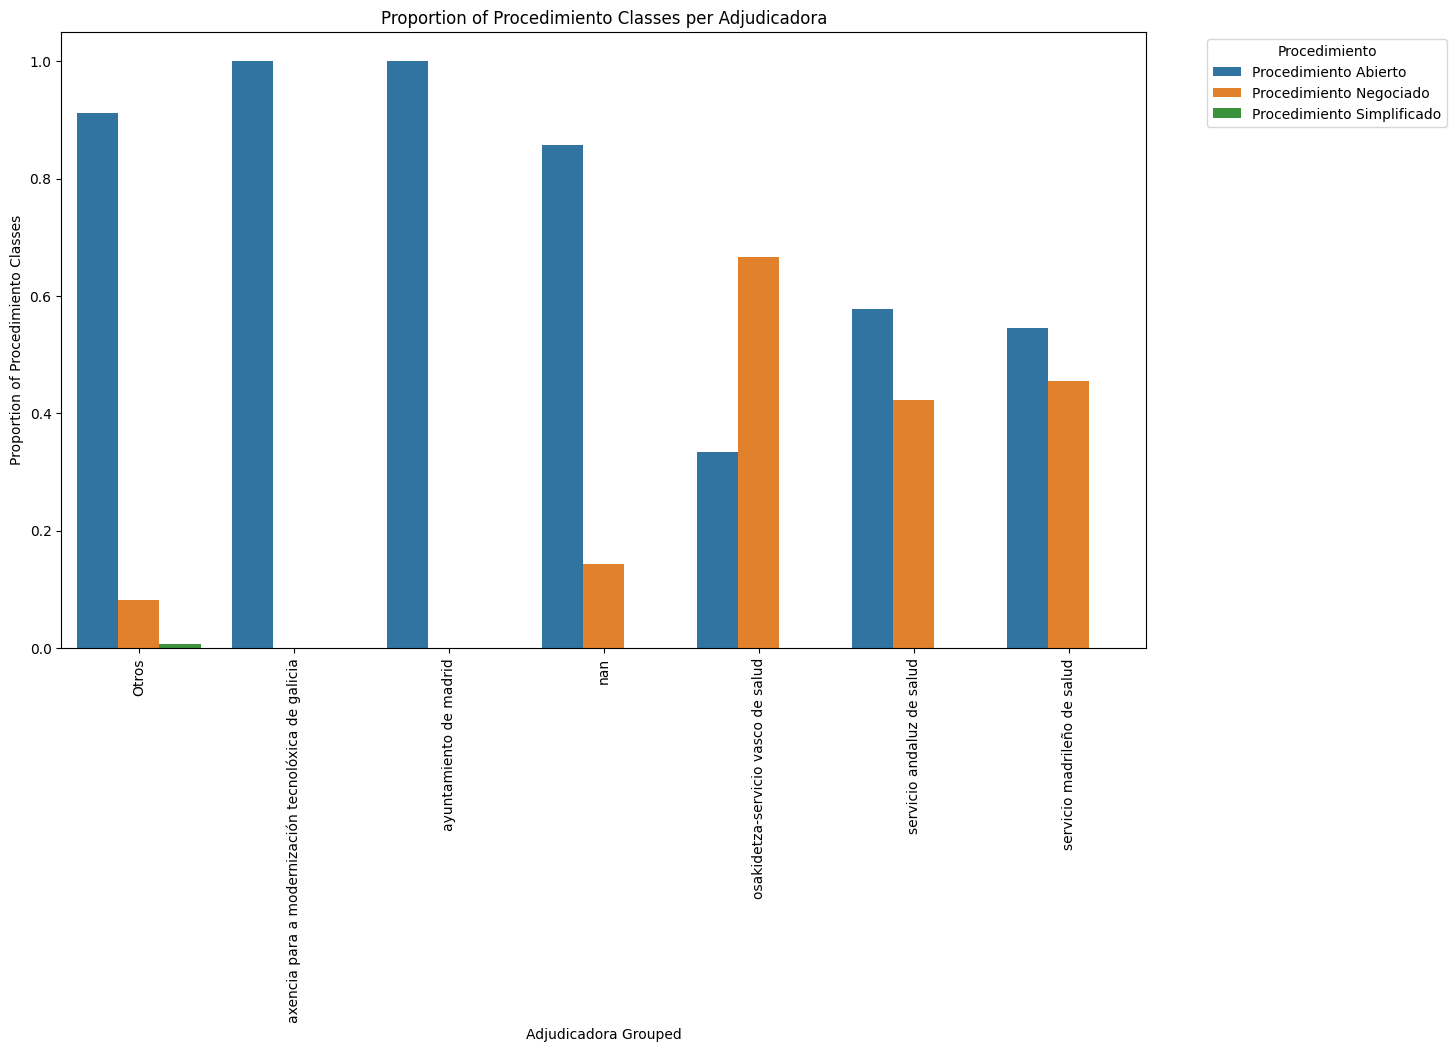

In [681]:
plt.figure(figsize=(14, 8))
sns.barplot(x='adjudicadora_grouped', y='proportion', hue='procedimiento', data=proportion_df)
plt.xlabel('Adjudicadora Grouped')
plt.ylabel('Proportion of Procedimiento Classes')
plt.title('Proportion of Procedimiento Classes per Adjudicadora')
plt.xticks(rotation=90)
plt.legend(title='Procedimiento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [682]:
tipo_proportion_df = cleaned_data.groupby(['adjudicadora_grouped', 'tipo']).size().reset_index(name='count')
total_per_adjudicadora_tipo = tipo_proportion_df.groupby('adjudicadora_grouped')['count'].sum().reset_index(name='total')
tipo_proportion_df = tipo_proportion_df.merge(total_per_adjudicadora_tipo, on='adjudicadora_grouped')
tipo_proportion_df['proportion'] = tipo_proportion_df['count'] / tipo_proportion_df['total']

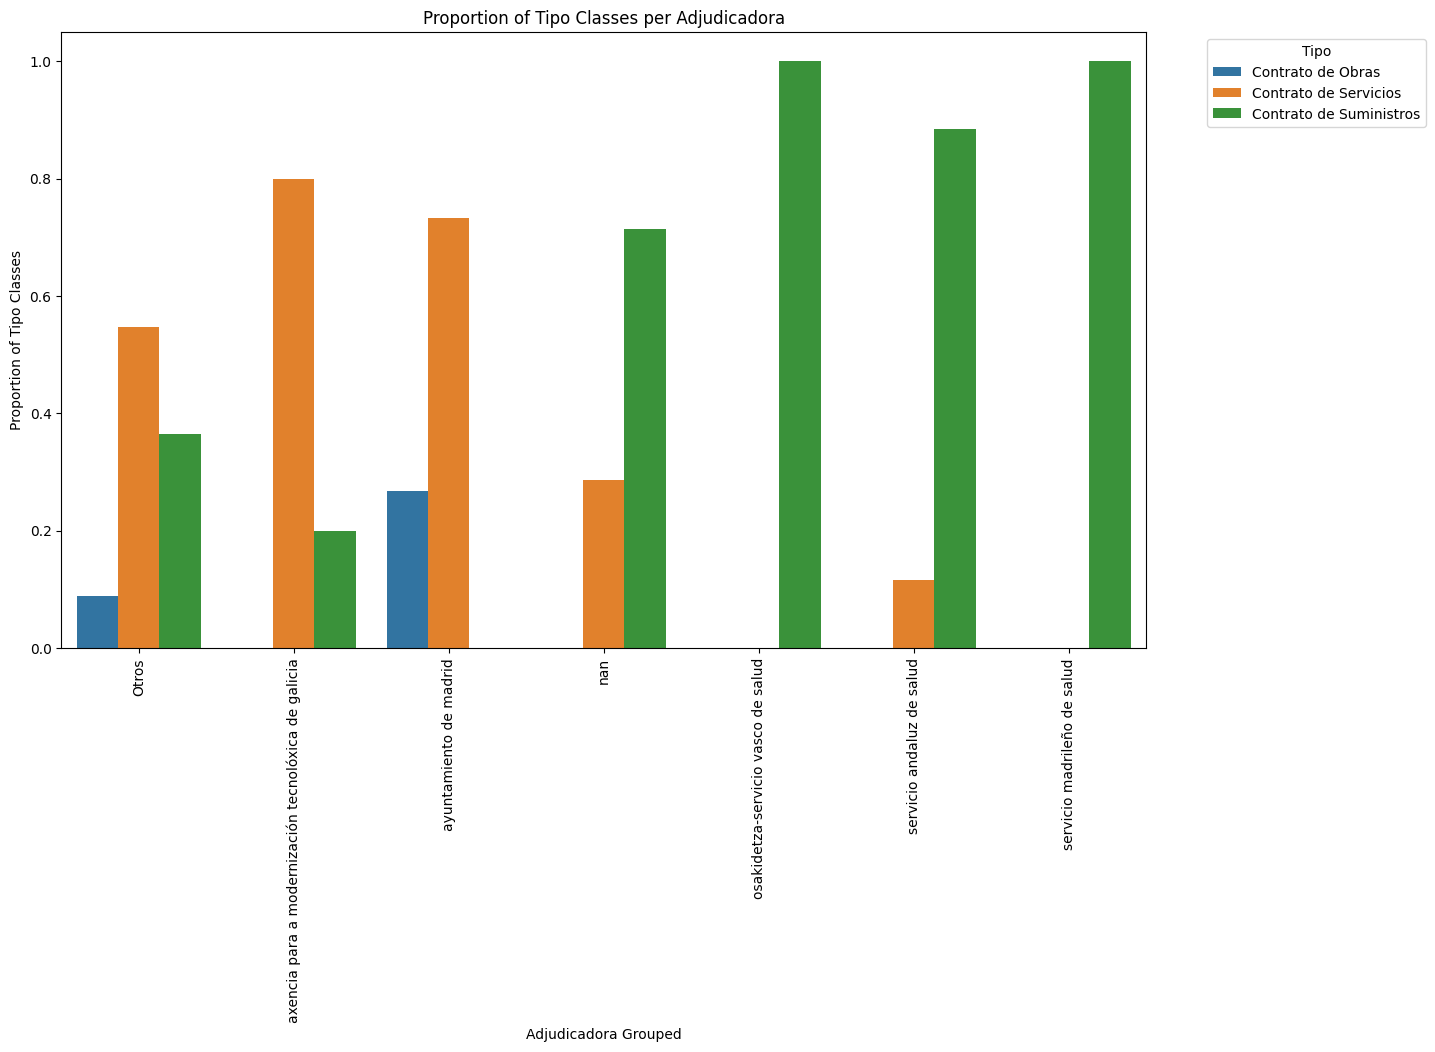

In [683]:
# Plot the proportion of tipo classes for each adjudicadora_grouped
plt.figure(figsize=(14, 8))
sns.barplot(x='adjudicadora_grouped', y='proportion', hue='tipo', data=tipo_proportion_df)
plt.xlabel('Adjudicadora Grouped')
plt.ylabel('Proportion of Tipo Classes')
plt.title('Proportion of Tipo Classes per Adjudicadora')
plt.xticks(rotation=90)
plt.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [684]:
# Calculate the proportion of each tramitacion class within each adjudicadora_grouped
tramitacion_proportion_df = cleaned_data.groupby(['adjudicadora_grouped', 'tramitacion']).size().reset_index(name='count')
total_per_adjudicadora_tramitacion = tramitacion_proportion_df.groupby('adjudicadora_grouped')['count'].sum().reset_index(name='total')
tramitacion_proportion_df = tramitacion_proportion_df.merge(total_per_adjudicadora_tramitacion, on='adjudicadora_grouped')
tramitacion_proportion_df['proportion'] = tramitacion_proportion_df['count'] / tramitacion_proportion_df['total']

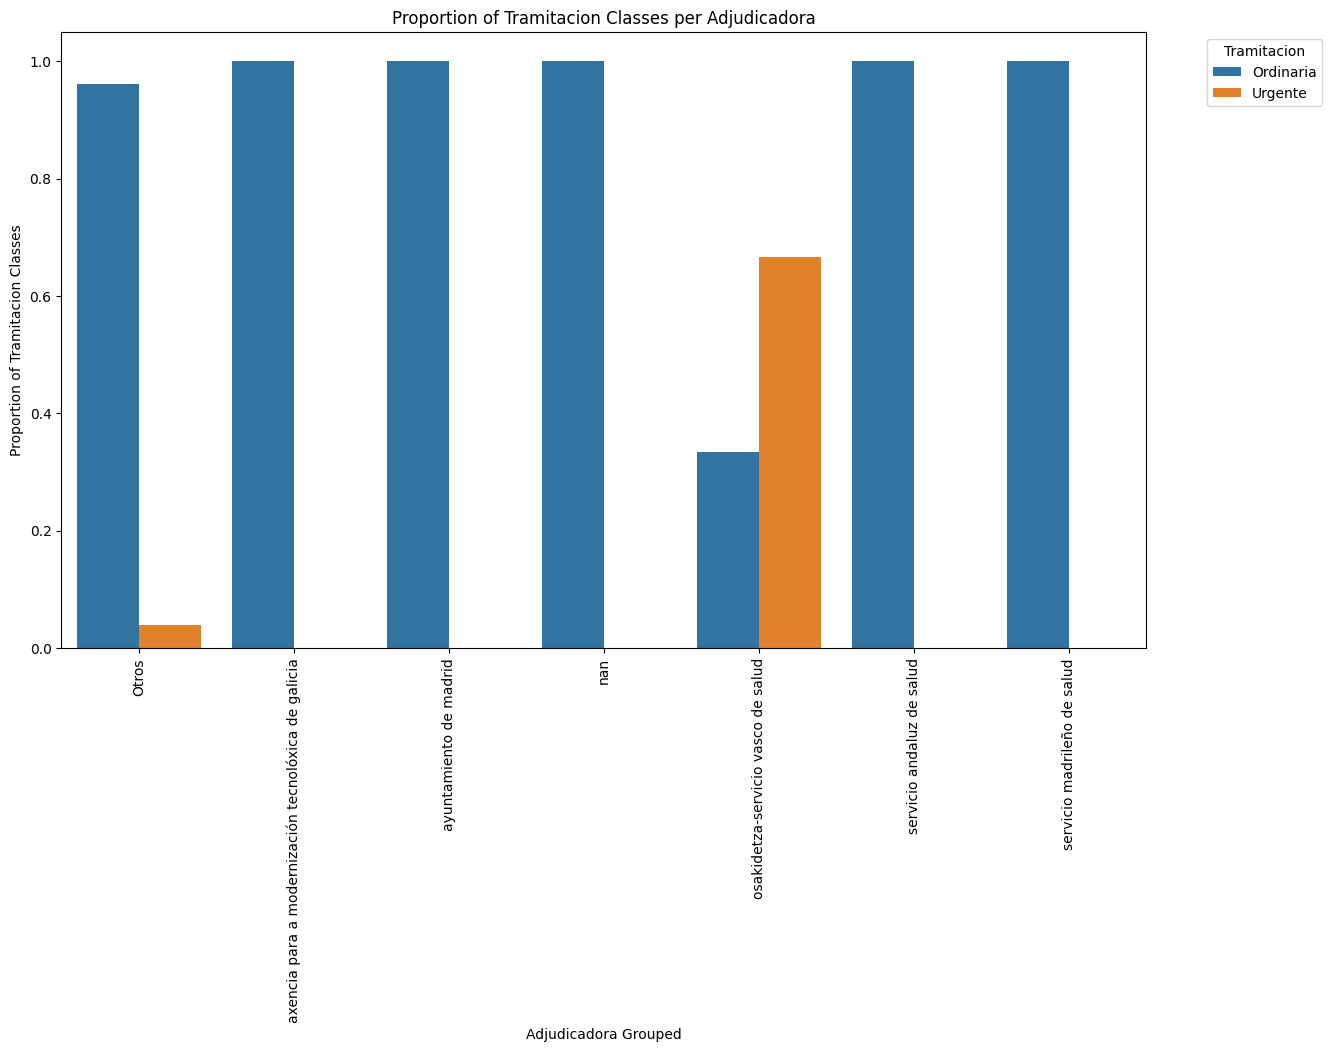

In [685]:
# Plot the proportion of tramitacion classes for each adjudicadora_grouped
plt.figure(figsize=(14, 8))
sns.barplot(x='adjudicadora_grouped', y='proportion', hue='tramitacion', data=tramitacion_proportion_df)
plt.xlabel('Adjudicadora Grouped')
plt.ylabel('Proportion of Tramitacion Classes')
plt.title('Proportion of Tramitacion Classes per Adjudicadora')
plt.xticks(rotation=90)
plt.legend(title='Tramitacion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1400x800 with 0 Axes>

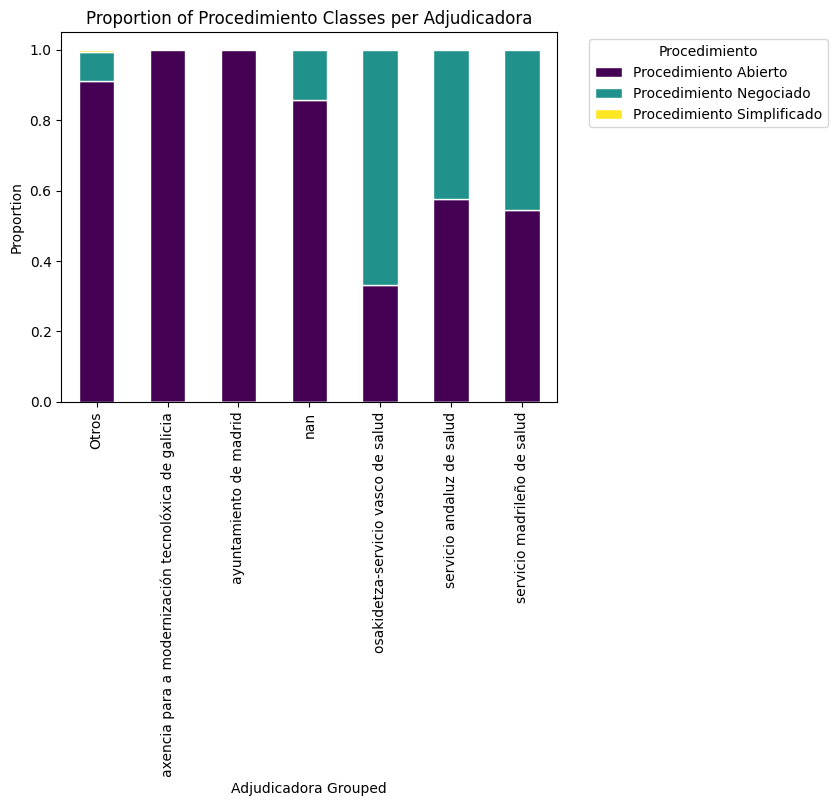

<Figure size 1400x800 with 0 Axes>

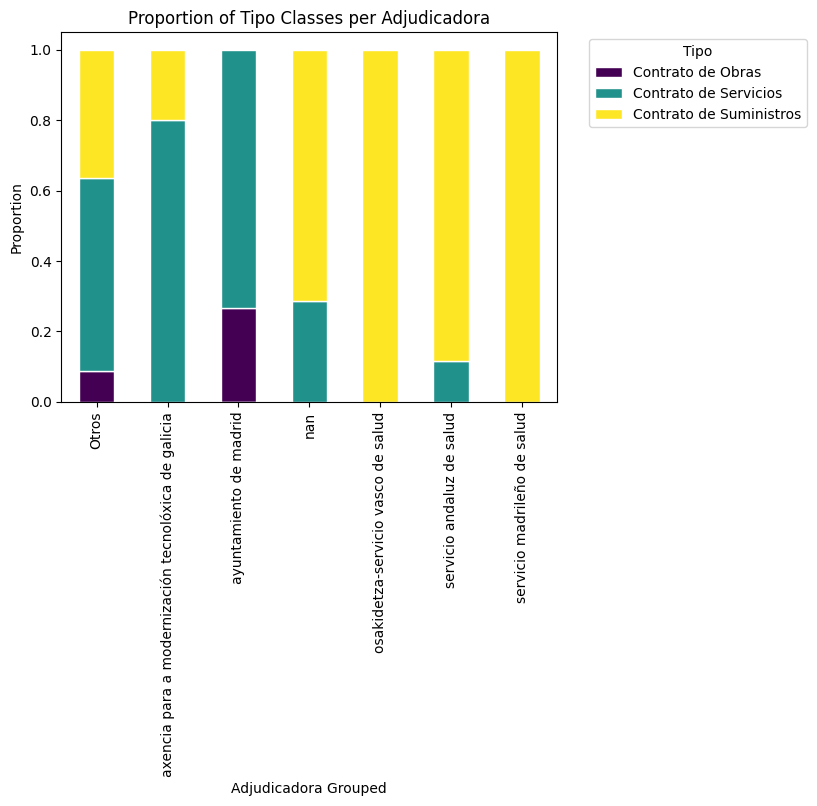

<Figure size 1400x800 with 0 Axes>

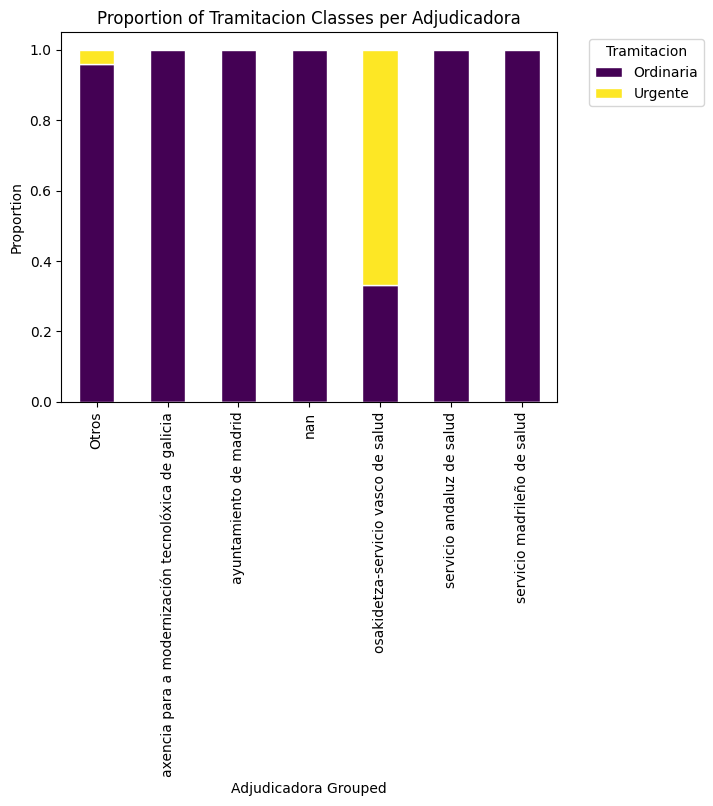

In [686]:
# Calculate the proportions for 'procedimiento', 'tipo', and 'tramitacion' within each 'adjudicadora_grouped'
proportion_procedimiento_df = cleaned_data.groupby(['adjudicadora_grouped', 'procedimiento']).size().reset_index(name='count')
total_per_adjudicadora_proc = proportion_procedimiento_df.groupby('adjudicadora_grouped')['count'].sum().reset_index(name='total')
proportion_procedimiento_df = proportion_procedimiento_df.merge(total_per_adjudicadora_proc, on='adjudicadora_grouped')
proportion_procedimiento_df['proportion'] = proportion_procedimiento_df['count'] / proportion_procedimiento_df['total']

proportion_tipo_df = cleaned_data.groupby(['adjudicadora_grouped', 'tipo']).size().reset_index(name='count')
total_per_adjudicadora_tipo = proportion_tipo_df.groupby('adjudicadora_grouped')['count'].sum().reset_index(name='total')
proportion_tipo_df = proportion_tipo_df.merge(total_per_adjudicadora_tipo, on='adjudicadora_grouped')
proportion_tipo_df['proportion'] = proportion_tipo_df['count'] / proportion_tipo_df['total']

proportion_tramitacion_df = cleaned_data.groupby(['adjudicadora_grouped', 'tramitacion']).size().reset_index(name='count')
total_per_adjudicadora_tram = proportion_tramitacion_df.groupby('adjudicadora_grouped')['count'].sum().reset_index(name='total')
proportion_tramitacion_df = proportion_tramitacion_df.merge(total_per_adjudicadora_tram, on='adjudicadora_grouped')
proportion_tramitacion_df['proportion'] = proportion_tramitacion_df['count'] / proportion_tramitacion_df['total']

# Create pivot tables for each category to plot stacked bar chart
procedimiento_pivot = proportion_procedimiento_df.pivot(index='adjudicadora_grouped', columns='procedimiento', values='proportion').fillna(0)
tipo_pivot = proportion_tipo_df.pivot(index='adjudicadora_grouped', columns='tipo', values='proportion').fillna(0)
tramitacion_pivot = proportion_tramitacion_df.pivot(index='adjudicadora_grouped', columns='tramitacion', values='proportion').fillna(0)

# Plot the stacked bar chart for 'procedimiento'
plt.figure(figsize=(14, 8))
procedimiento_pivot.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='white')
plt.xlabel('Adjudicadora Grouped')
plt.ylabel('Proportion')
plt.title('Proportion of Procedimiento Classes per Adjudicadora')
plt.xticks(rotation=90)
plt.legend(title='Procedimiento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot the stacked bar chart for 'tipo'
plt.figure(figsize=(14, 8))
tipo_pivot.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='white')
plt.xlabel('Adjudicadora Grouped')
plt.ylabel('Proportion')
plt.title('Proportion of Tipo Classes per Adjudicadora')
plt.xticks(rotation=90)
plt.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot the stacked bar chart for 'tramitacion'
plt.figure(figsize=(14, 8))
tramitacion_pivot.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='white')
plt.xlabel('Adjudicadora Grouped')
plt.ylabel('Proportion')
plt.title('Proportion of Tramitacion Classes per Adjudicadora')
plt.xticks(rotation=90)
plt.legend(title='Tramitacion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


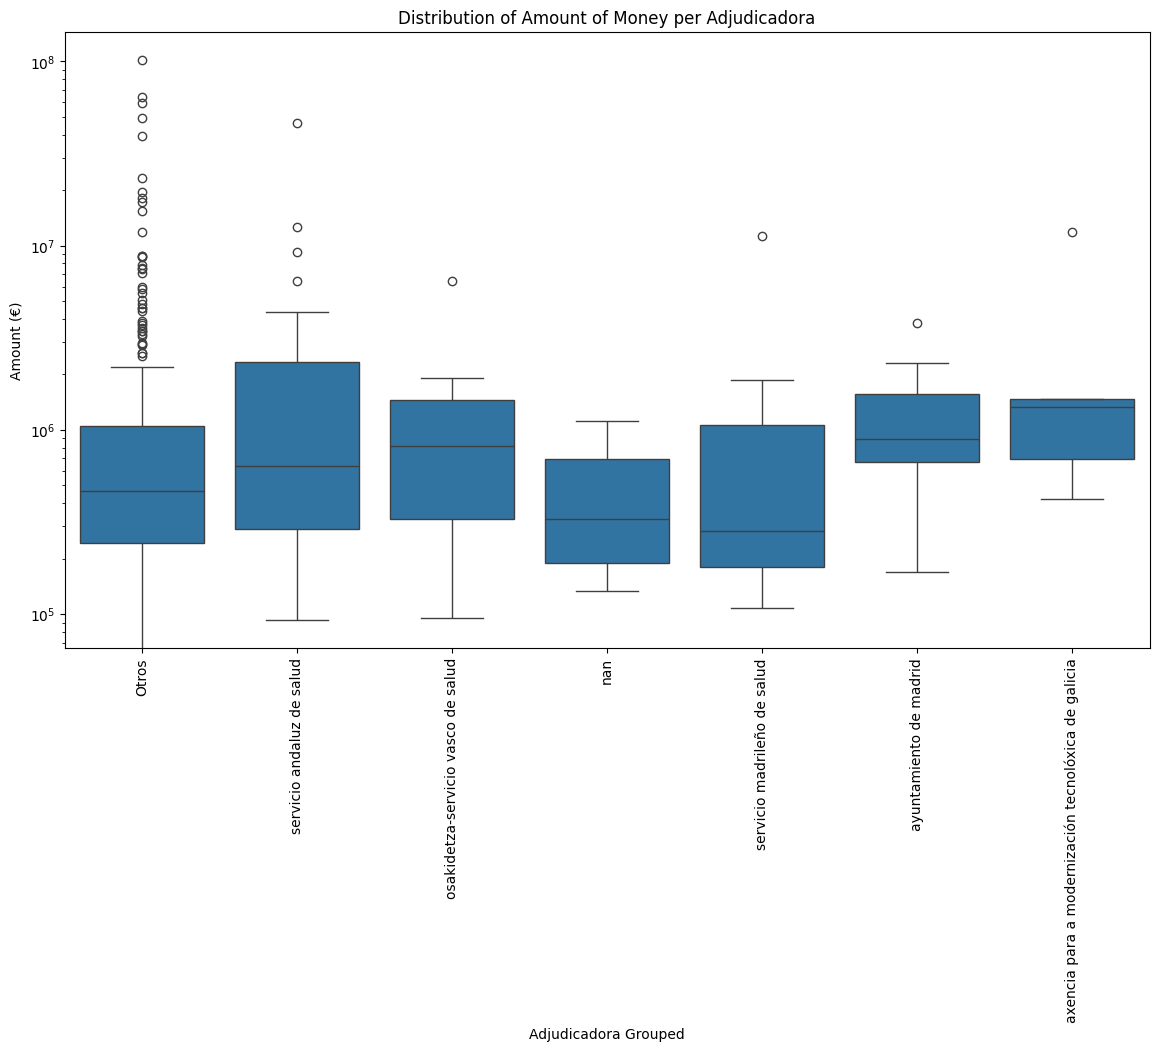

In [687]:
# Plot the distribution of the amount of money for each adjudicadora_grouped
plt.figure(figsize=(14, 8))
sns.boxplot(x='adjudicadora_grouped', y='amount', data=cleaned_data)
plt.yscale('log')  # Use a logarithmic scale for better visualization of distributions with large variance
plt.xlabel('Adjudicadora Grouped')
plt.ylabel('Amount (€)')
plt.title('Distribution of Amount of Money per Adjudicadora')
plt.xticks(rotation=90)
plt.show()

The y-axis is on a logarithmic scale to better visualize distributions with large variance

/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_1655/4160395117.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_amount', y='company_grouped', data=top_companies_filtered_df, palette='viridis')


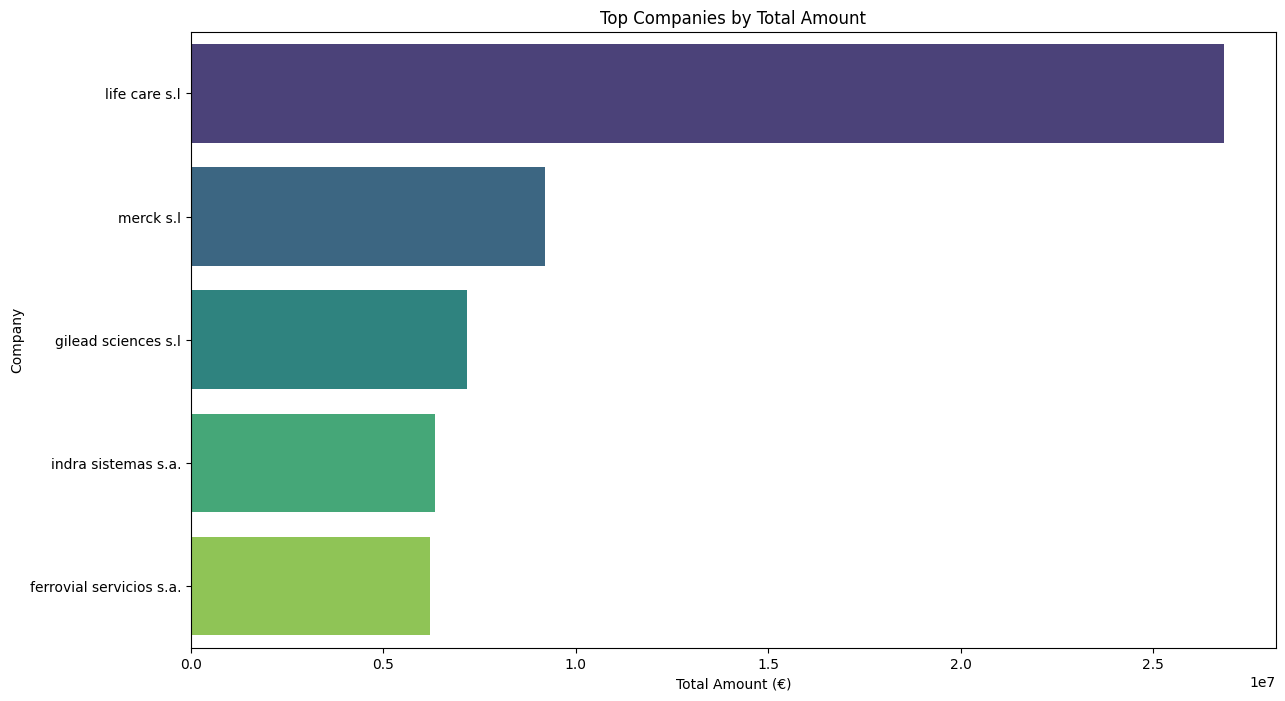

In [688]:
# Calculate the total amount per company
top_companies_df = cleaned_data.groupby('company_grouped').agg(total_amount=('amount', 'sum')).reset_index()

# Sort the companies by total amount in descending order and select the top companies
top_companies_df = top_companies_df.sort_values(by='total_amount', ascending=False).head(10)

top_companies_filtered_df = top_companies_df[top_companies_df['company_grouped'] != 'Otros']

# Remove nan
top_companies_filtered_df = top_companies_filtered_df[top_companies_filtered_df['company_grouped'] != 'nan']

# Plot the top companies by amount excluding "Otros" without using hue
plt.figure(figsize=(14, 8))
sns.barplot(x='total_amount', y='company_grouped', data=top_companies_filtered_df, palette='viridis')
plt.xlabel('Total Amount (€)')
plt.ylabel('Company')
plt.title('Top Companies by Total Amount')
plt.show()

<Figure size 1400x800 with 0 Axes>

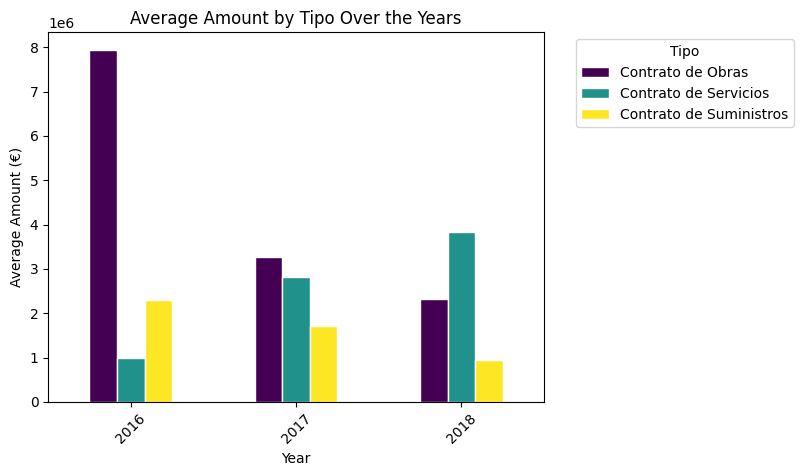

<Figure size 1400x800 with 0 Axes>

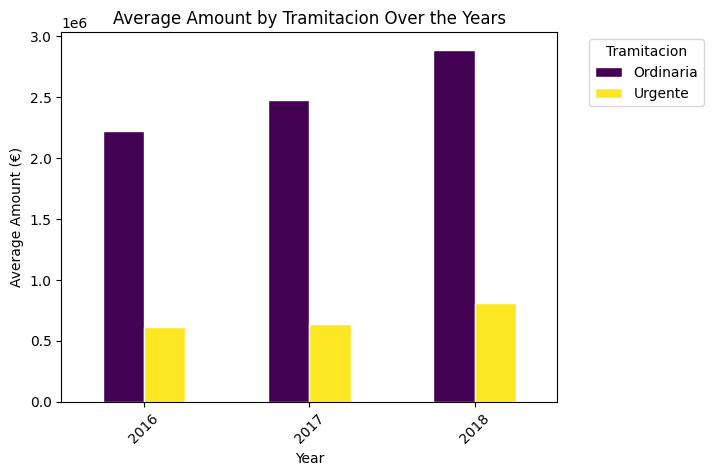

<Figure size 1400x800 with 0 Axes>

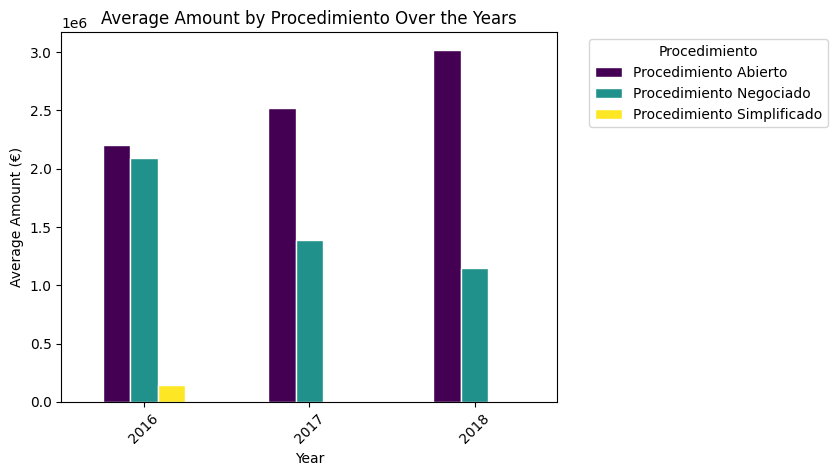

In [689]:
# Extract the year from 'mm_yyyy'
cleaned_data['year'] = cleaned_data['mm_yyyy'].dt.year
# Calculate the average amount for each 'tipo', 'tramitacion', and 'procedimiento' per year
tipo_avg_amount_df = cleaned_data.groupby(['year', 'tipo']).agg(avg_amount=('amount', 'mean')).reset_index()
tramitacion_avg_amount_df = cleaned_data.groupby(['year', 'tramitacion']).agg(avg_amount=('amount', 'mean')).reset_index()
procedimiento_avg_amount_df = cleaned_data.groupby(['year', 'procedimiento']).agg(avg_amount=('amount', 'mean')).reset_index()

# Create a pivot table for each category to plot stacked bar chart
tipo_avg_pivot = tipo_avg_amount_df.pivot(index='year', columns='tipo', values='avg_amount').fillna(0)
tramitacion_avg_pivot = tramitacion_avg_amount_df.pivot(index='year', columns='tramitacion', values='avg_amount').fillna(0)
procedimiento_avg_pivot = procedimiento_avg_amount_df.pivot(index='year', columns='procedimiento', values='avg_amount').fillna(0)

# Plot the stacked bar chart for average amount by 'tipo'
plt.figure(figsize=(14, 8))
tipo_avg_pivot.plot(kind='bar', colormap='viridis', edgecolor='white')
plt.xlabel('Year')
plt.ylabel('Average Amount (€)')
plt.title('Average Amount by Tipo Over the Years')
plt.xticks(rotation=45)
plt.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot the stacked bar chart for average amount by 'tramitacion'
plt.figure(figsize=(14, 8))
tramitacion_avg_pivot.plot(kind='bar', colormap='viridis', edgecolor='white')
plt.xlabel('Year')
plt.ylabel('Average Amount (€)')
plt.title('Average Amount by Tramitacion Over the Years')
plt.xticks(rotation=45)
plt.legend(title='Tramitacion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot the stacked bar chart for average amount by 'procedimiento'
plt.figure(figsize=(14, 8))
procedimiento_avg_pivot.plot(kind='bar', colormap='viridis', edgecolor='white')
plt.xlabel('Year')
plt.ylabel('Average Amount (€)')
plt.title('Average Amount by Procedimiento Over the Years')
plt.xticks(rotation=45)
plt.legend(title='Procedimiento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Before

/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_1655/1732774949.py:31: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


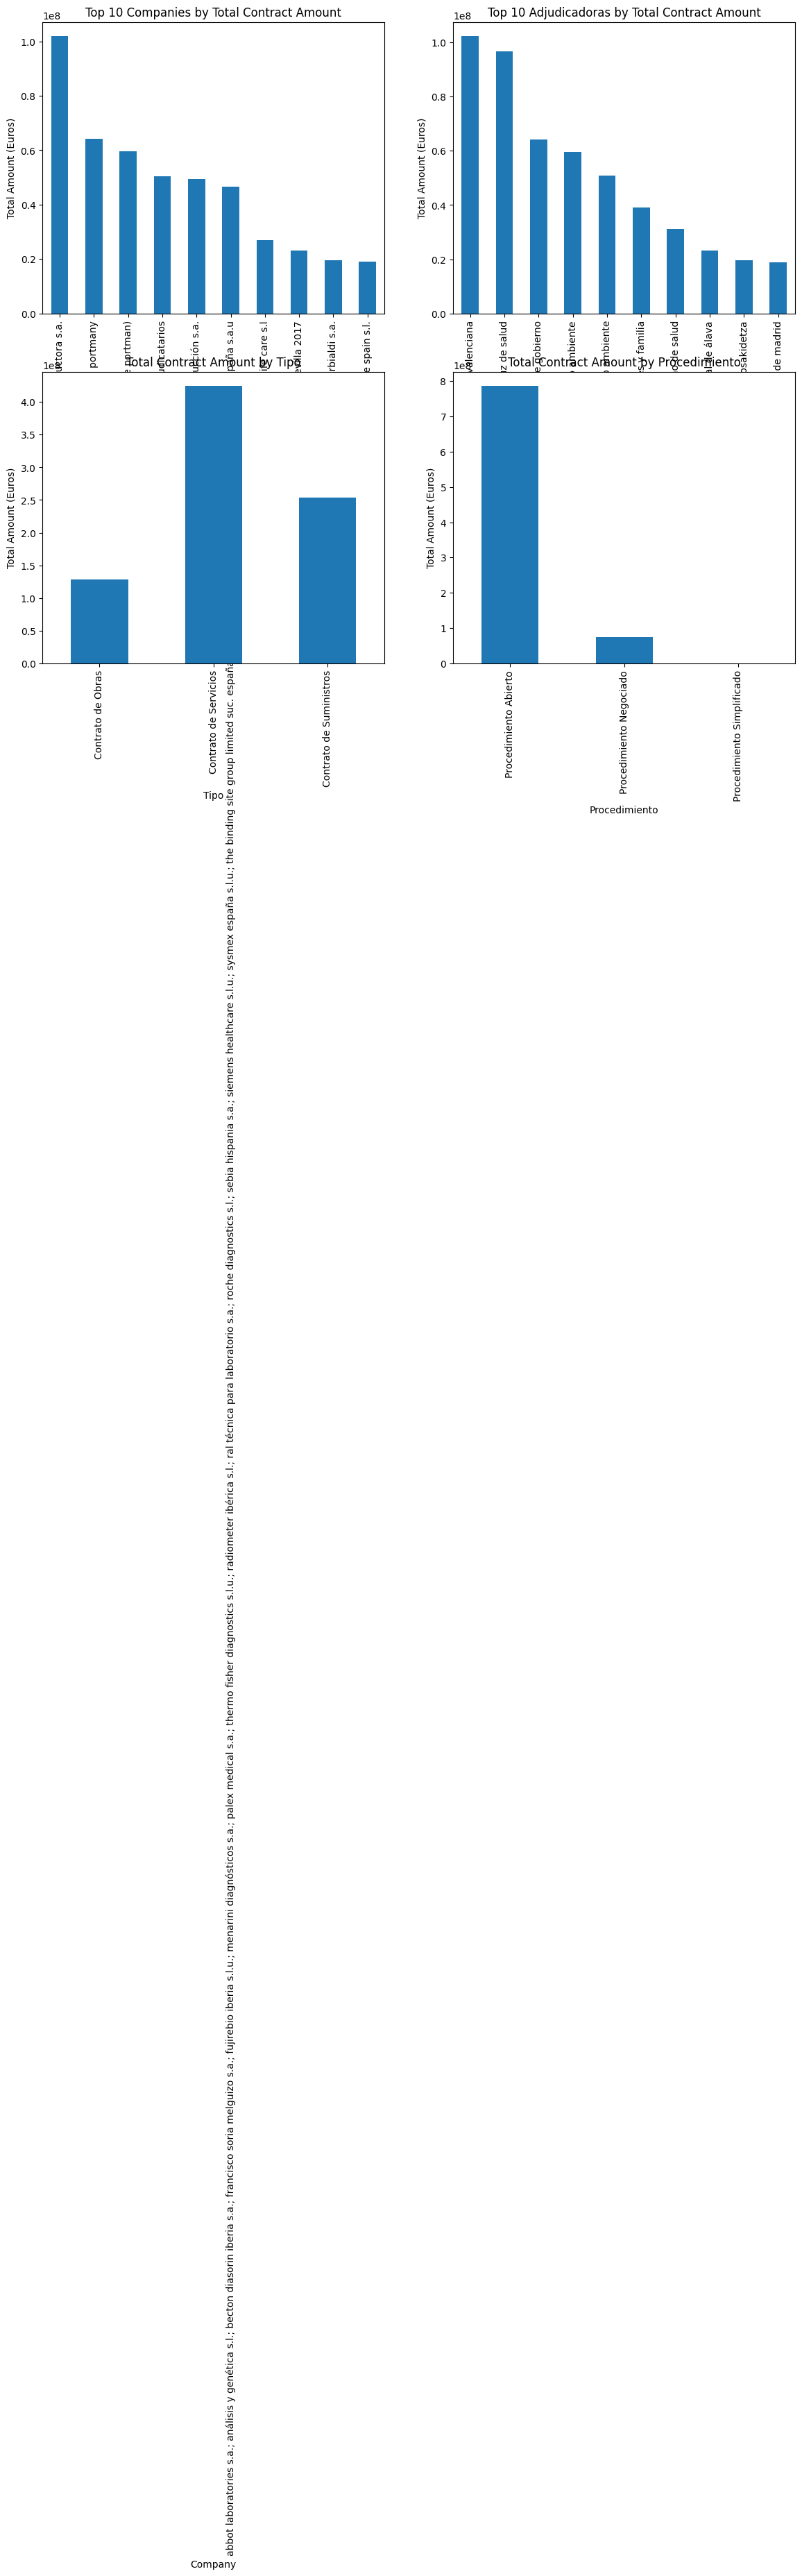

         amount     time
amount  1.00000 -0.00653
time   -0.00653  1.00000


In [690]:
# Correlation analysis
correlation_matrix = cleaned_data[['amount', 'time']].corr()

# Visualizing relationships
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Amount vs. Company
cleaned_data.groupby('company')['amount'].sum().nlargest(10).plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Companies by Total Contract Amount')
axes[0, 0].set_xlabel('Company')
axes[0, 0].set_ylabel('Total Amount (Euros)')

# Amount vs. Adjudicadora
cleaned_data.groupby('adjudicadora')['amount'].sum().nlargest(10).plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Adjudicadoras by Total Contract Amount')
axes[0, 1].set_xlabel('Adjudicadora')
axes[0, 1].set_ylabel('Total Amount (Euros)')

# Amount vs. Tipo
cleaned_data.groupby('tipo')['amount'].sum().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Total Contract Amount by Tipo')
axes[1, 0].set_xlabel('Tipo')
axes[1, 0].set_ylabel('Total Amount (Euros)')

# Amount vs. Procedimiento
cleaned_data.groupby('procedimiento')['amount'].sum().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Total Contract Amount by Procedimiento')
axes[1, 1].set_xlabel('Procedimiento')
axes[1, 1].set_ylabel('Total Amount (Euros)')

plt.tight_layout()
plt.show()

# Display correlation matrix
print(correlation_matrix)

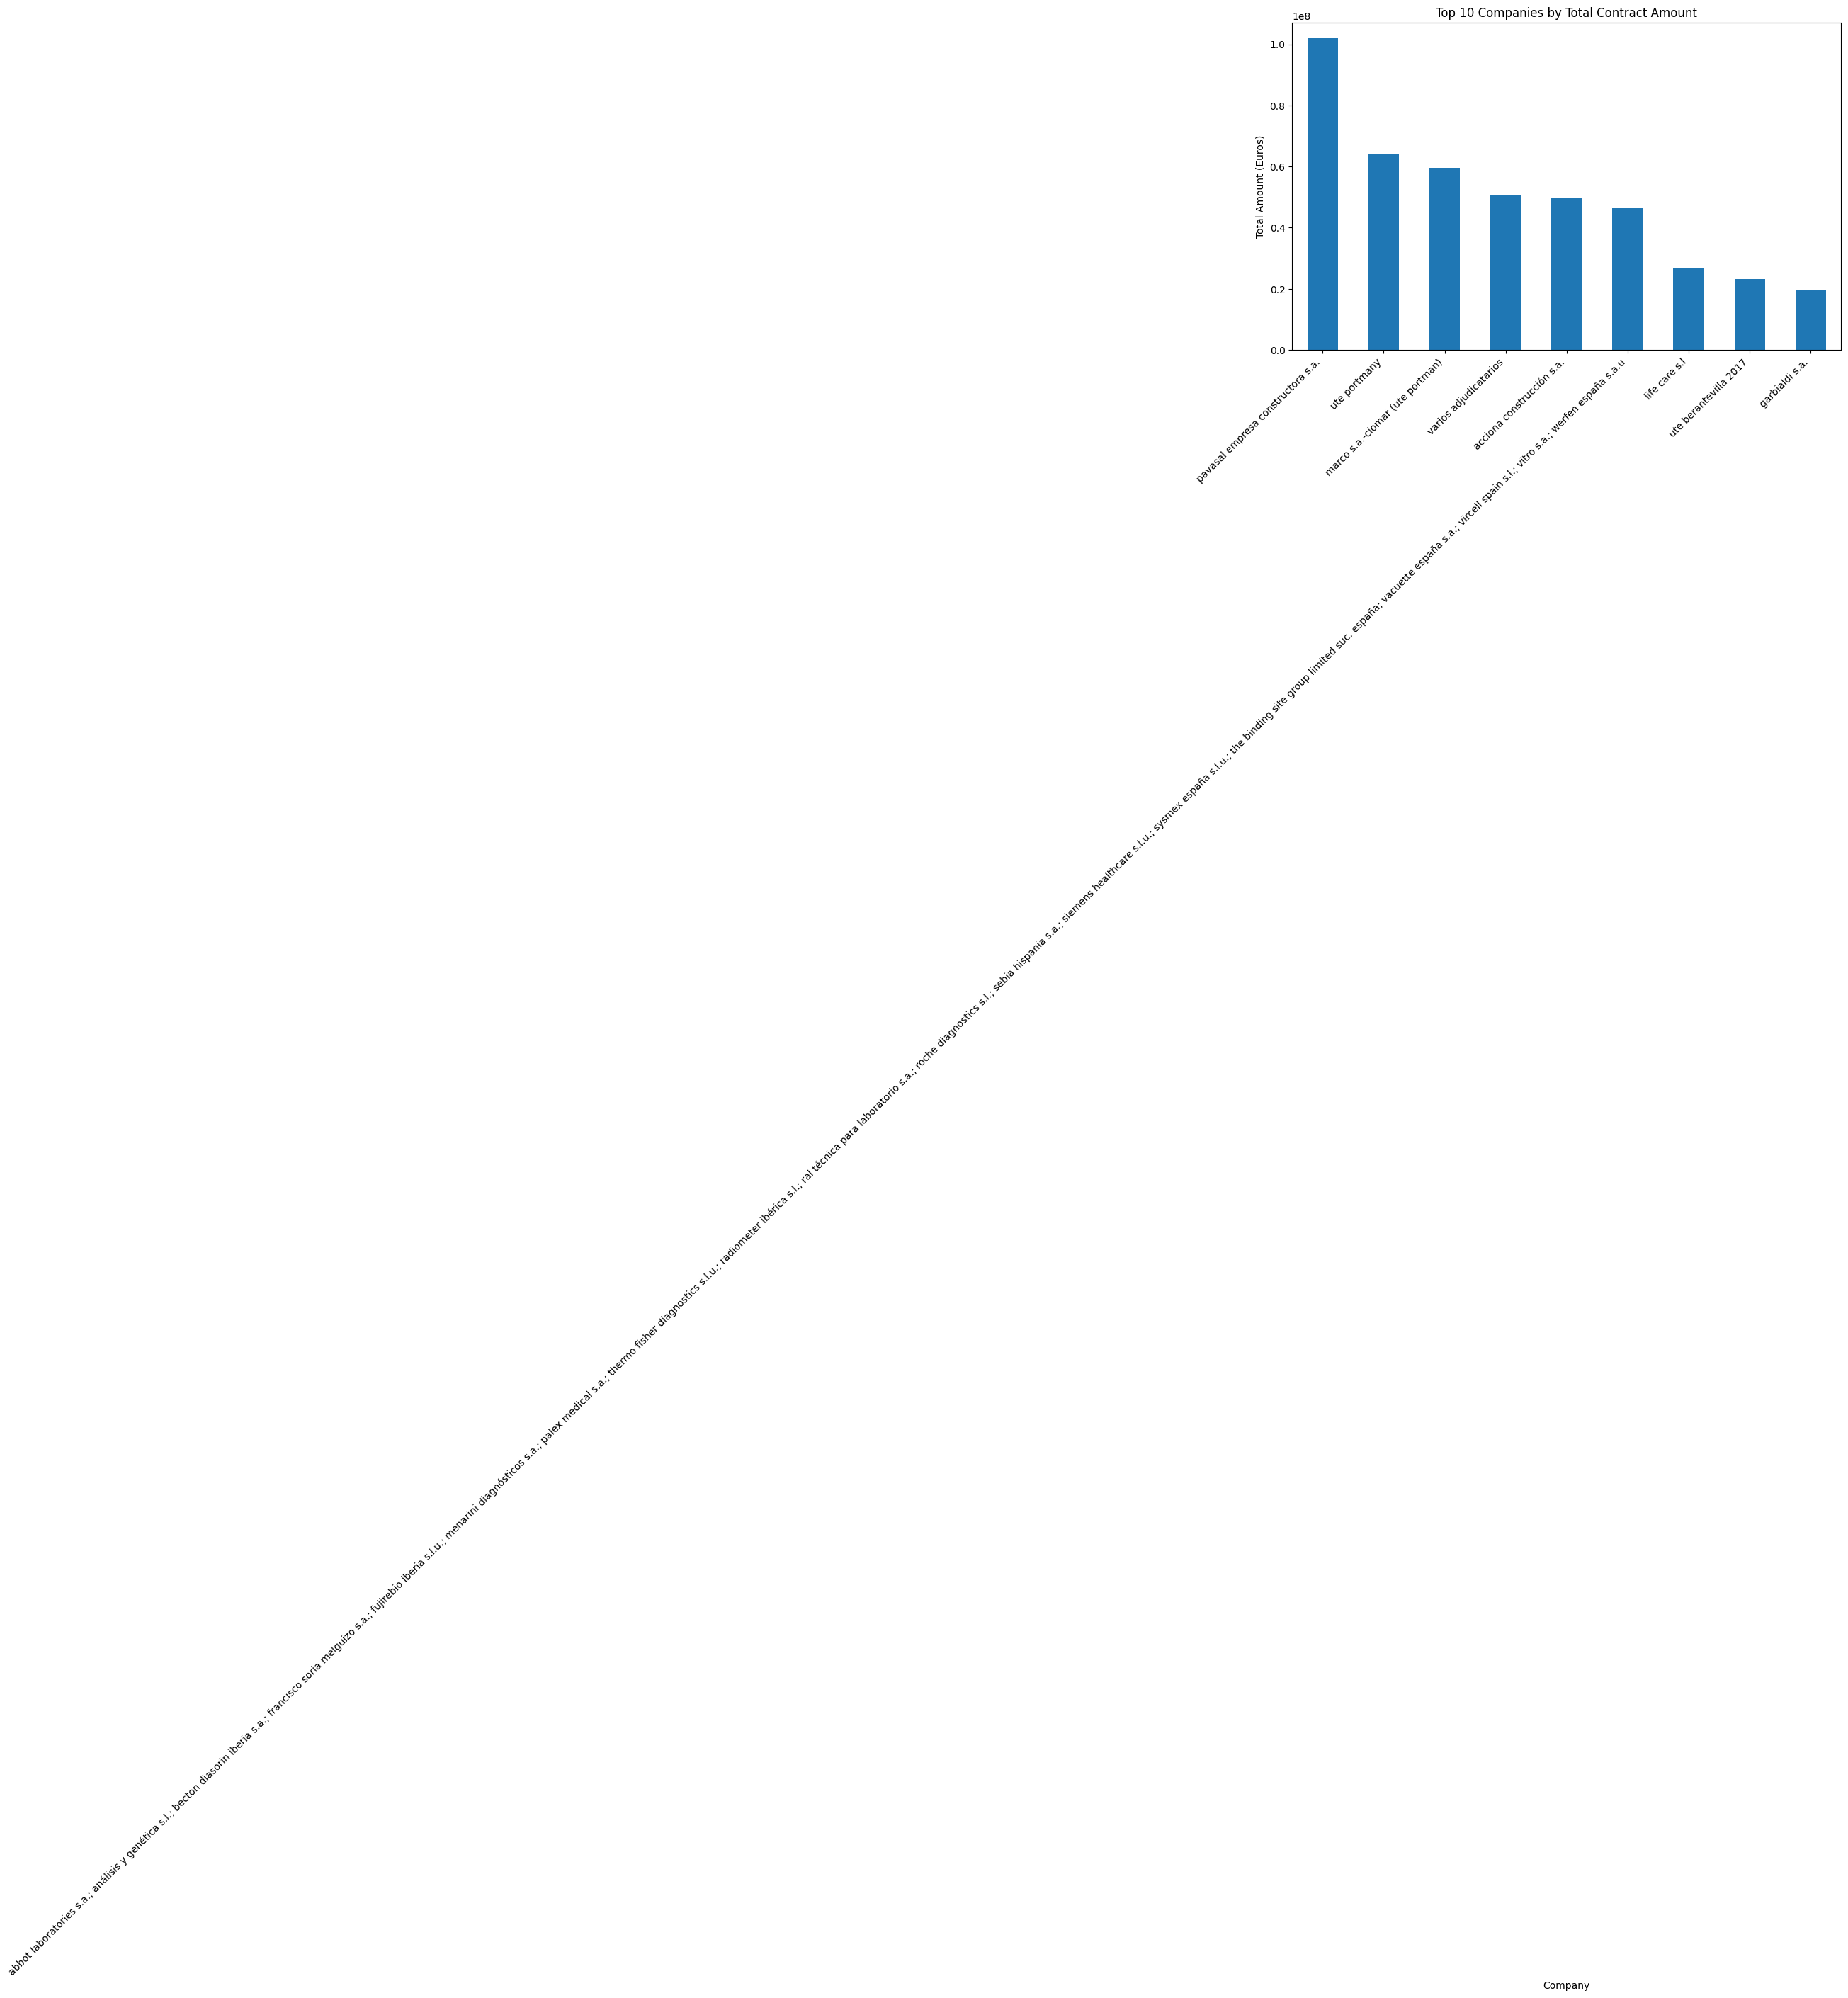

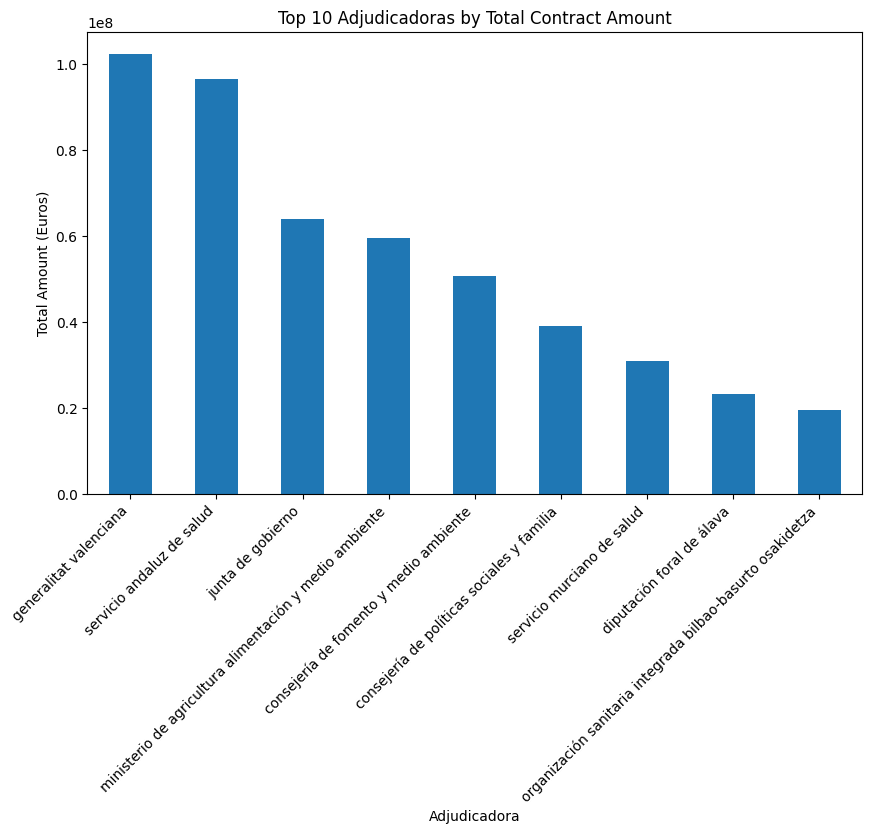

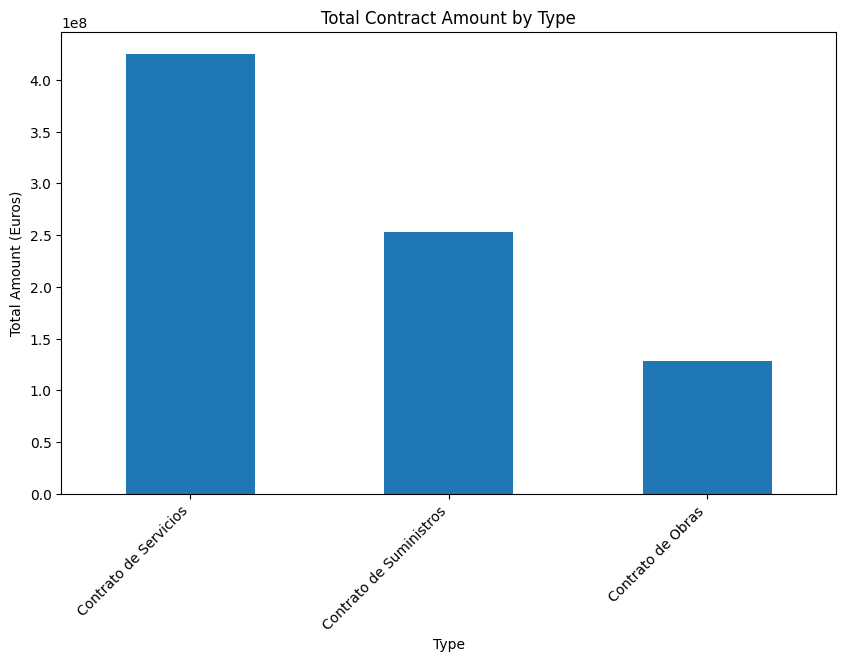

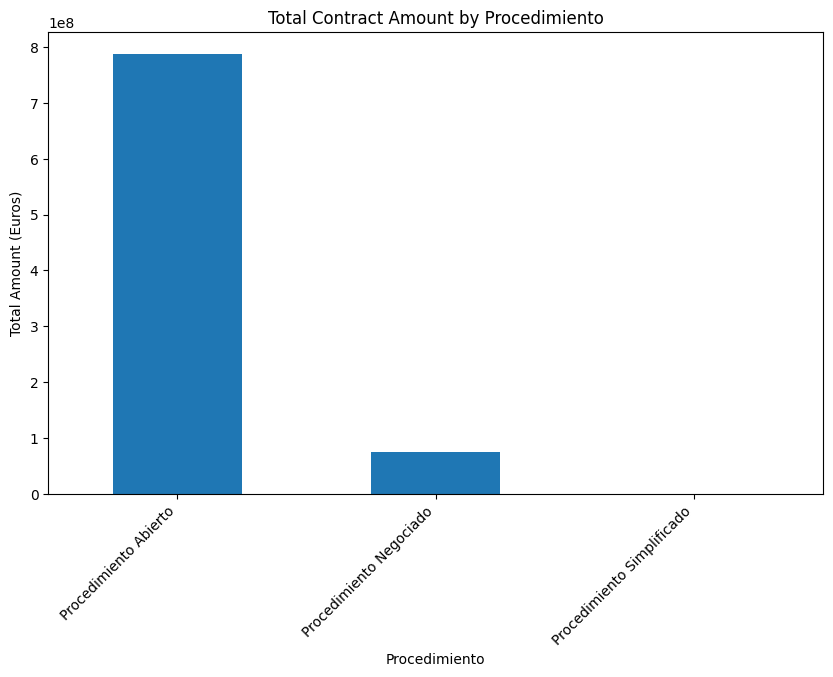

In [691]:
import matplotlib.pyplot as plt

# Load the data again in case it is necessary

# Function to plot top 10 by column
def plot_top_10(df, column, value, title, xlabel, ylabel):
    top_10 = df.groupby(column)[value].sum().sort_values(ascending=False).head(9)
    plt.figure(figsize=(10, 6))
    top_10.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot top 10 companies by total contract amount
plot_top_10(cleaned_data, 'company', 'amount', 'Top 10 Companies by Total Contract Amount', 'Company', 'Total Amount (Euros)')

# Plot top 10 adjudicadoras by total contract amount
plot_top_10(cleaned_data, 'adjudicadora', 'amount', 'Top 10 Adjudicadoras by Total Contract Amount', 'Adjudicadora', 'Total Amount (Euros)')

# Plot total contract amount by type
plot_top_10(cleaned_data, 'tipo', 'amount', 'Total Contract Amount by Type', 'Type', 'Total Amount (Euros)')

# Plot total contract amount by procedimiento
plot_top_10(cleaned_data, 'procedimiento', 'amount', 'Total Contract Amount by Procedimiento', 'Procedimiento', 'Total Amount (Euros)')

1. Top 10 Companies by Total Contract Amount:

    - The bar chart displays the companies that have the highest total contract amounts. This can help identify the major players in the dataset.
2. Top 10 Adjudicadoras by Total Contract Amount:

    - This chart shows which adjudicating authorities are involved in the largest total contract amounts, providing insight into the most significant contracting entities.
3. Total Contract Amount by Tipo:

    - The distribution of contract amounts by tipo (type) of contract highlights which types of contracts are associated with the highest total amounts.
4. Total Contract Amount by Procedimiento:

    - This visualization helps understand the distribution of contract amounts by the procedure type used.
5. Correlation Analysis:

    - The correlation matrix shows a weak positive correlation (0.074) between amount and time, indicating that there is not a strong linear relationship between these two variables.

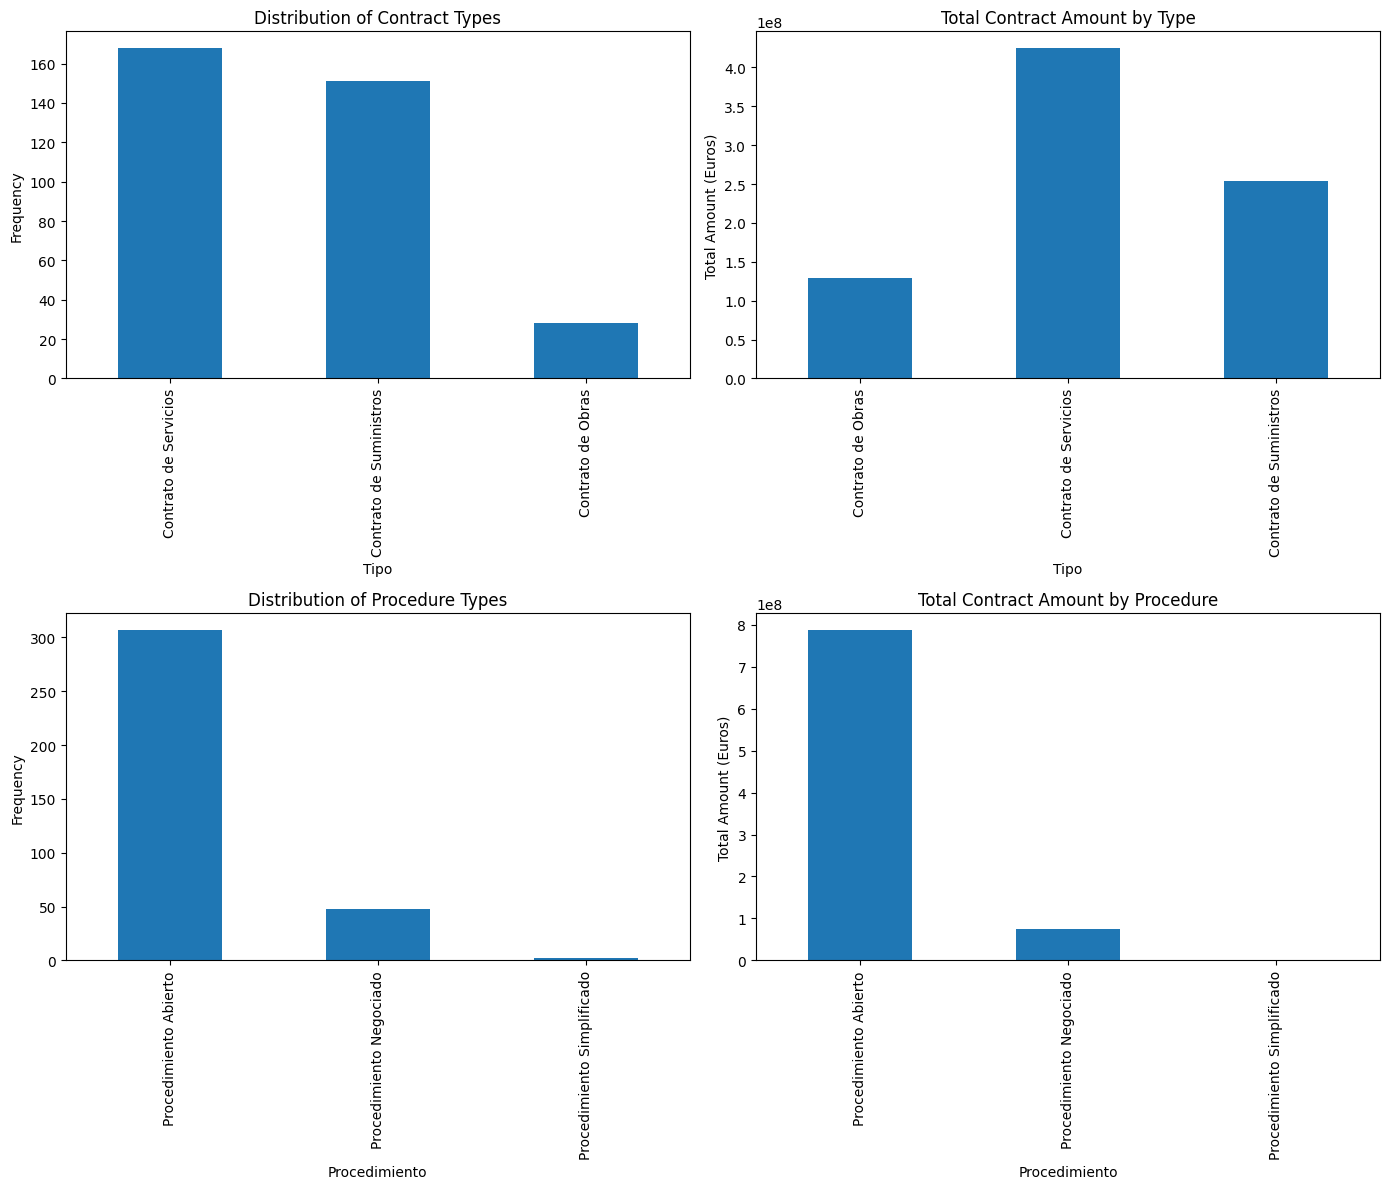

company
pavasal empresa constructora s.a.                                                                                                                                                                                                                                                                                                                                                                                                                                                                            1.020000e+08
ute portmany                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [692]:
# Segmentation Analysis

# 1. Distribution and total amounts of different contract types
tipo_distribution = cleaned_data['tipo'].value_counts()
tipo_amounts = cleaned_data.groupby('tipo')['amount'].sum()

# 2. Distribution and total amounts of different procedure types
procedimiento_distribution = cleaned_data['procedimiento'].value_counts()
procedimiento_amounts = cleaned_data.groupby('procedimiento')['amount'].sum()

# 3. Top 10 Companies by Total Contract Amount
top_companies = cleaned_data.groupby('company')['amount'].sum().nlargest(10)

# Visualization
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Distribution of contract types
tipo_distribution.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Contract Types')
axes[0, 0].set_xlabel('Tipo')
axes[0, 0].set_ylabel('Frequency')

# Total amounts by contract type
tipo_amounts.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Total Contract Amount by Type')
axes[0, 1].set_xlabel('Tipo')
axes[0, 1].set_ylabel('Total Amount (Euros)')

# Distribution of procedure types
procedimiento_distribution.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Procedure Types')
axes[1, 0].set_xlabel('Procedimiento')
axes[1, 0].set_ylabel('Frequency')

# Total amounts by procedure type
procedimiento_amounts.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Total Contract Amount by Procedure')
axes[1, 1].set_xlabel('Procedimiento')
axes[1, 1].set_ylabel('Total Amount (Euros)')

plt.tight_layout()
plt.show()

# Displaying top companies
print(top_companies)

Observations from the Segmentation Analysis
1. Distribution and Total Amounts of Contract Types (tipo):

    - The first bar chart shows the frequency of different contract types.
    - The second bar chart displays the total contract amounts for each type, indicating which types are associated with higher financial values.
2. Distribution and Total Amounts of Procedure Types (procedimiento):

    - The third bar chart presents the frequency of different procedure types.
    - The fourth bar chart shows the total contract amounts for each procedure type, highlighting the financial distribution across different procedures.
3. Top 10 Companies by Total Contract Amount:
    - The top companies by total contract amount have been identified, providing insight into the major players in the dataset.

# Compare Amount depending on Tipo, Amount and Tramitacion

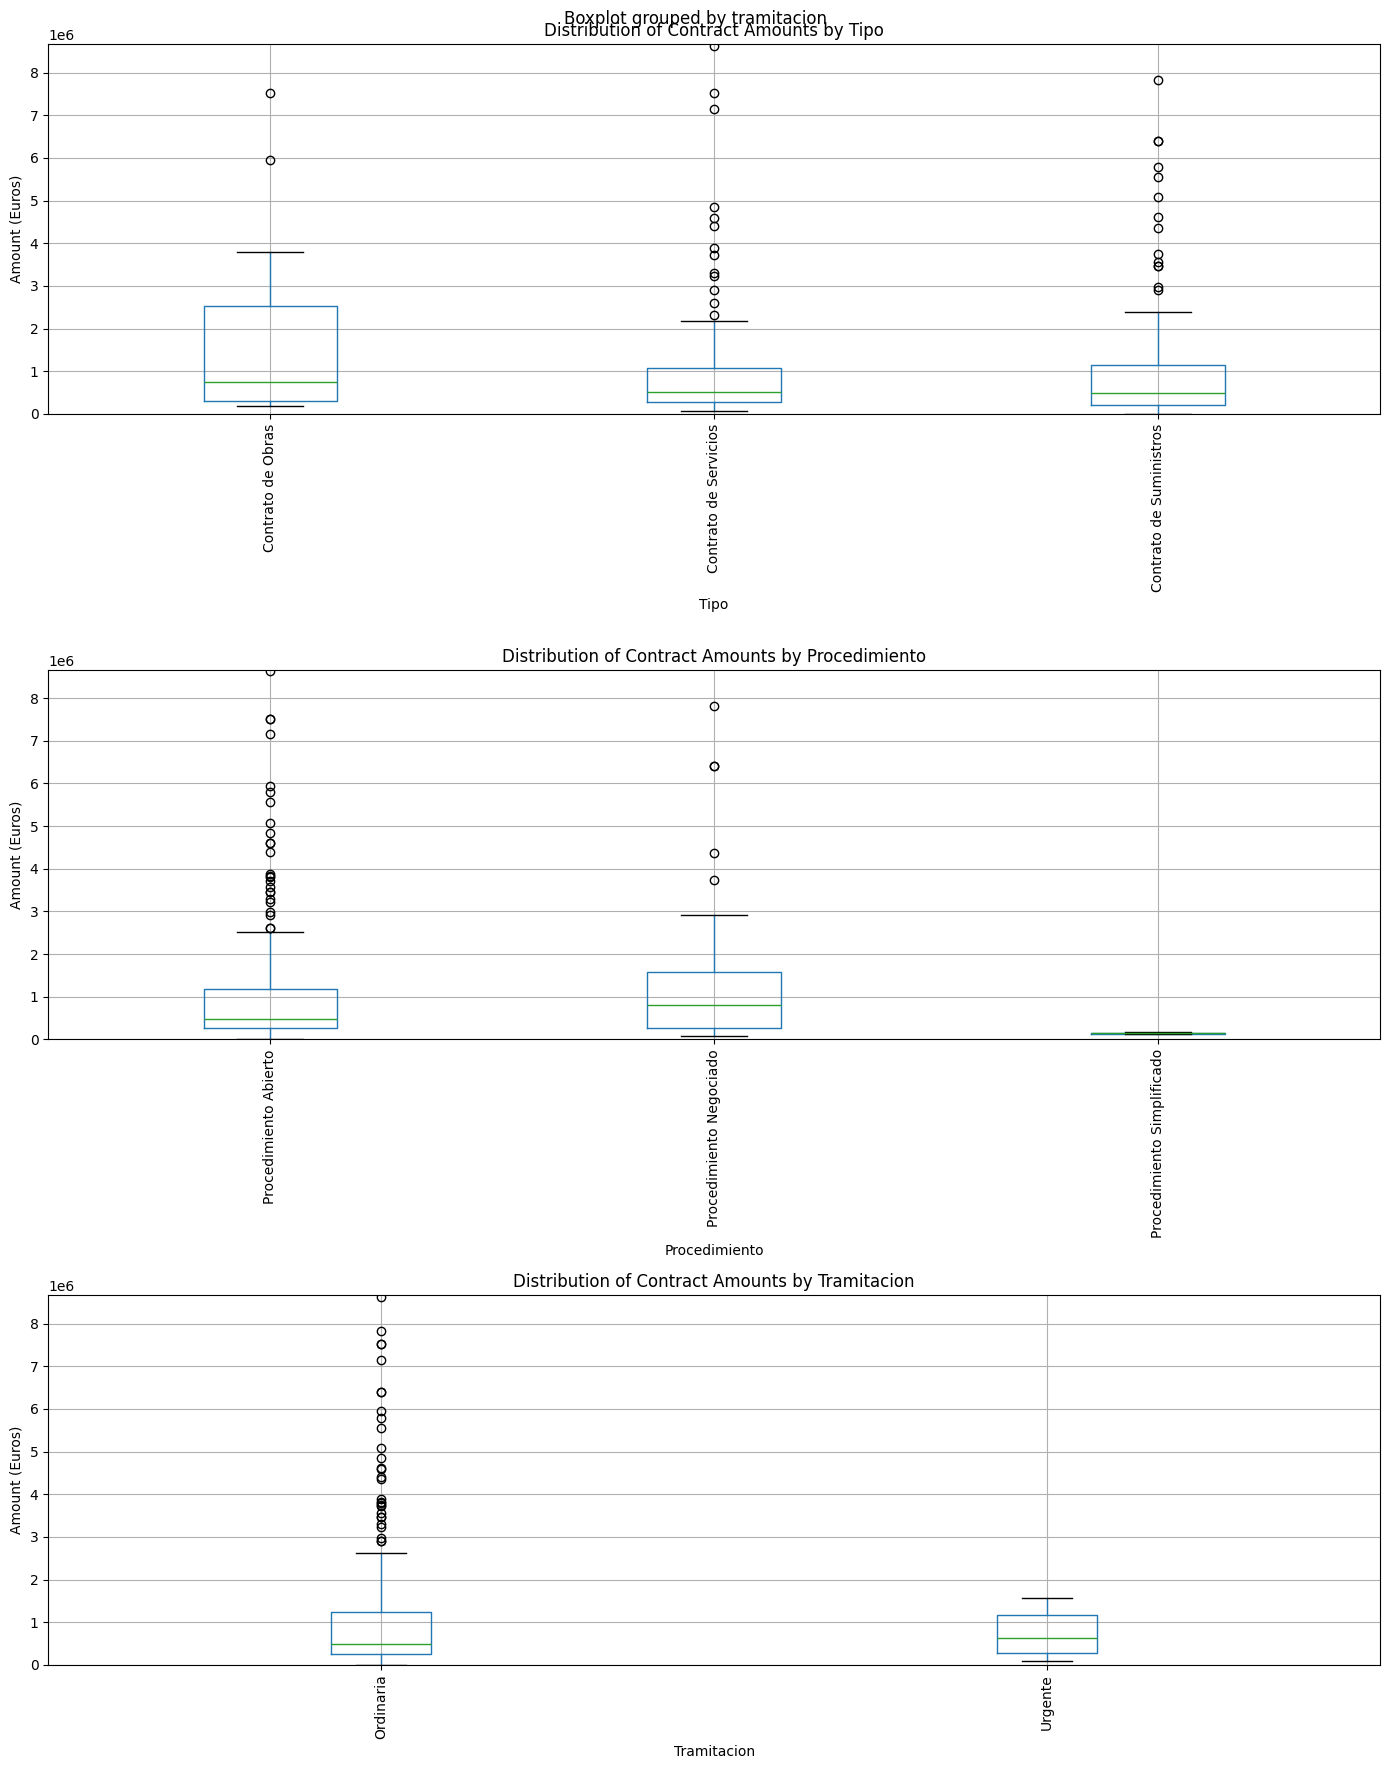

In [693]:
# Adjusting box plots for better readability

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# Distribution based on Tipo (limited y-axis)
cleaned_data.boxplot(column='amount', by='tipo', ax=axes[0])
axes[0].set_title('Distribution of Contract Amounts by Tipo')
axes[0].set_xlabel('Tipo')
axes[0].set_ylabel('Amount (Euros)')
axes[0].set_ylim(0, cleaned_data['amount'].quantile(0.95))
axes[0].tick_params(axis='x', rotation=90)

# Distribution based on Procedimiento (limited y-axis)
cleaned_data.boxplot(column='amount', by='procedimiento', ax=axes[1])
axes[1].set_title('Distribution of Contract Amounts by Procedimiento')
axes[1].set_xlabel('Procedimiento')
axes[1].set_ylabel('Amount (Euros)')
axes[1].set_ylim(0, cleaned_data['amount'].quantile(0.95))
axes[1].tick_params(axis='x', rotation=90)

# Distribution based on Tramitacion (limited y-axis)
cleaned_data.boxplot(column='amount', by='tramitacion', ax=axes[2])
axes[2].set_title('Distribution of Contract Amounts by Tramitacion')
axes[2].set_xlabel('Tramitacion')
axes[2].set_ylabel('Amount (Euros)')
axes[2].set_ylim(0, cleaned_data['amount'].quantile(0.95)) # 95th percentile to limit outliers
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Let´s group classes with low frequency

In [694]:
# Identifying the three most frequent classes for each category
top_tipos = cleaned_data['tipo'].value_counts().nlargest(3).index
top_procedimientos = cleaned_data['procedimiento'].value_counts().nlargest(3).index
top_adjudicadoras = cleaned_data['adjudicadora'].value_counts().nlargest(3).index

# Creating a new class 'Others' for less frequent classes
cleaned_data['tipo_grouped'] = cleaned_data['tipo'].apply(lambda x: x if x in top_tipos else 'Others')
cleaned_data['procedimiento_grouped'] = cleaned_data['procedimiento'].apply(lambda x: x if x in top_procedimientos else 'Others')
cleaned_data['adjudicadora_grouped'] = cleaned_data['adjudicadora'].apply(lambda x: x if x in top_adjudicadoras else 'Others')

# Verifying the new grouping
grouped_counts = {
    'tipo': cleaned_data['tipo_grouped'].value_counts(),
    'procedimiento': cleaned_data['procedimiento_grouped'].value_counts(),
    'adjudicadora': cleaned_data['adjudicadora_grouped'].value_counts()
}

grouped_counts

{'tipo': tipo_grouped
 Contrato de Servicios      168
 Contrato de Suministros    151
 Contrato de Obras           28
 Others                      10
 Name: count, dtype: int64,
 'procedimiento': procedimiento_grouped
 Procedimiento Abierto         307
 Procedimiento Negociado        48
 Procedimiento Simplificado      2
 Name: count, dtype: int64,
 'adjudicadora': adjudicadora_grouped
 Others                                304
 servicio andaluz de salud              26
 ayuntamiento de madrid                 15
 osakidetza-servicio vasco de salud     12
 Name: count, dtype: int64}

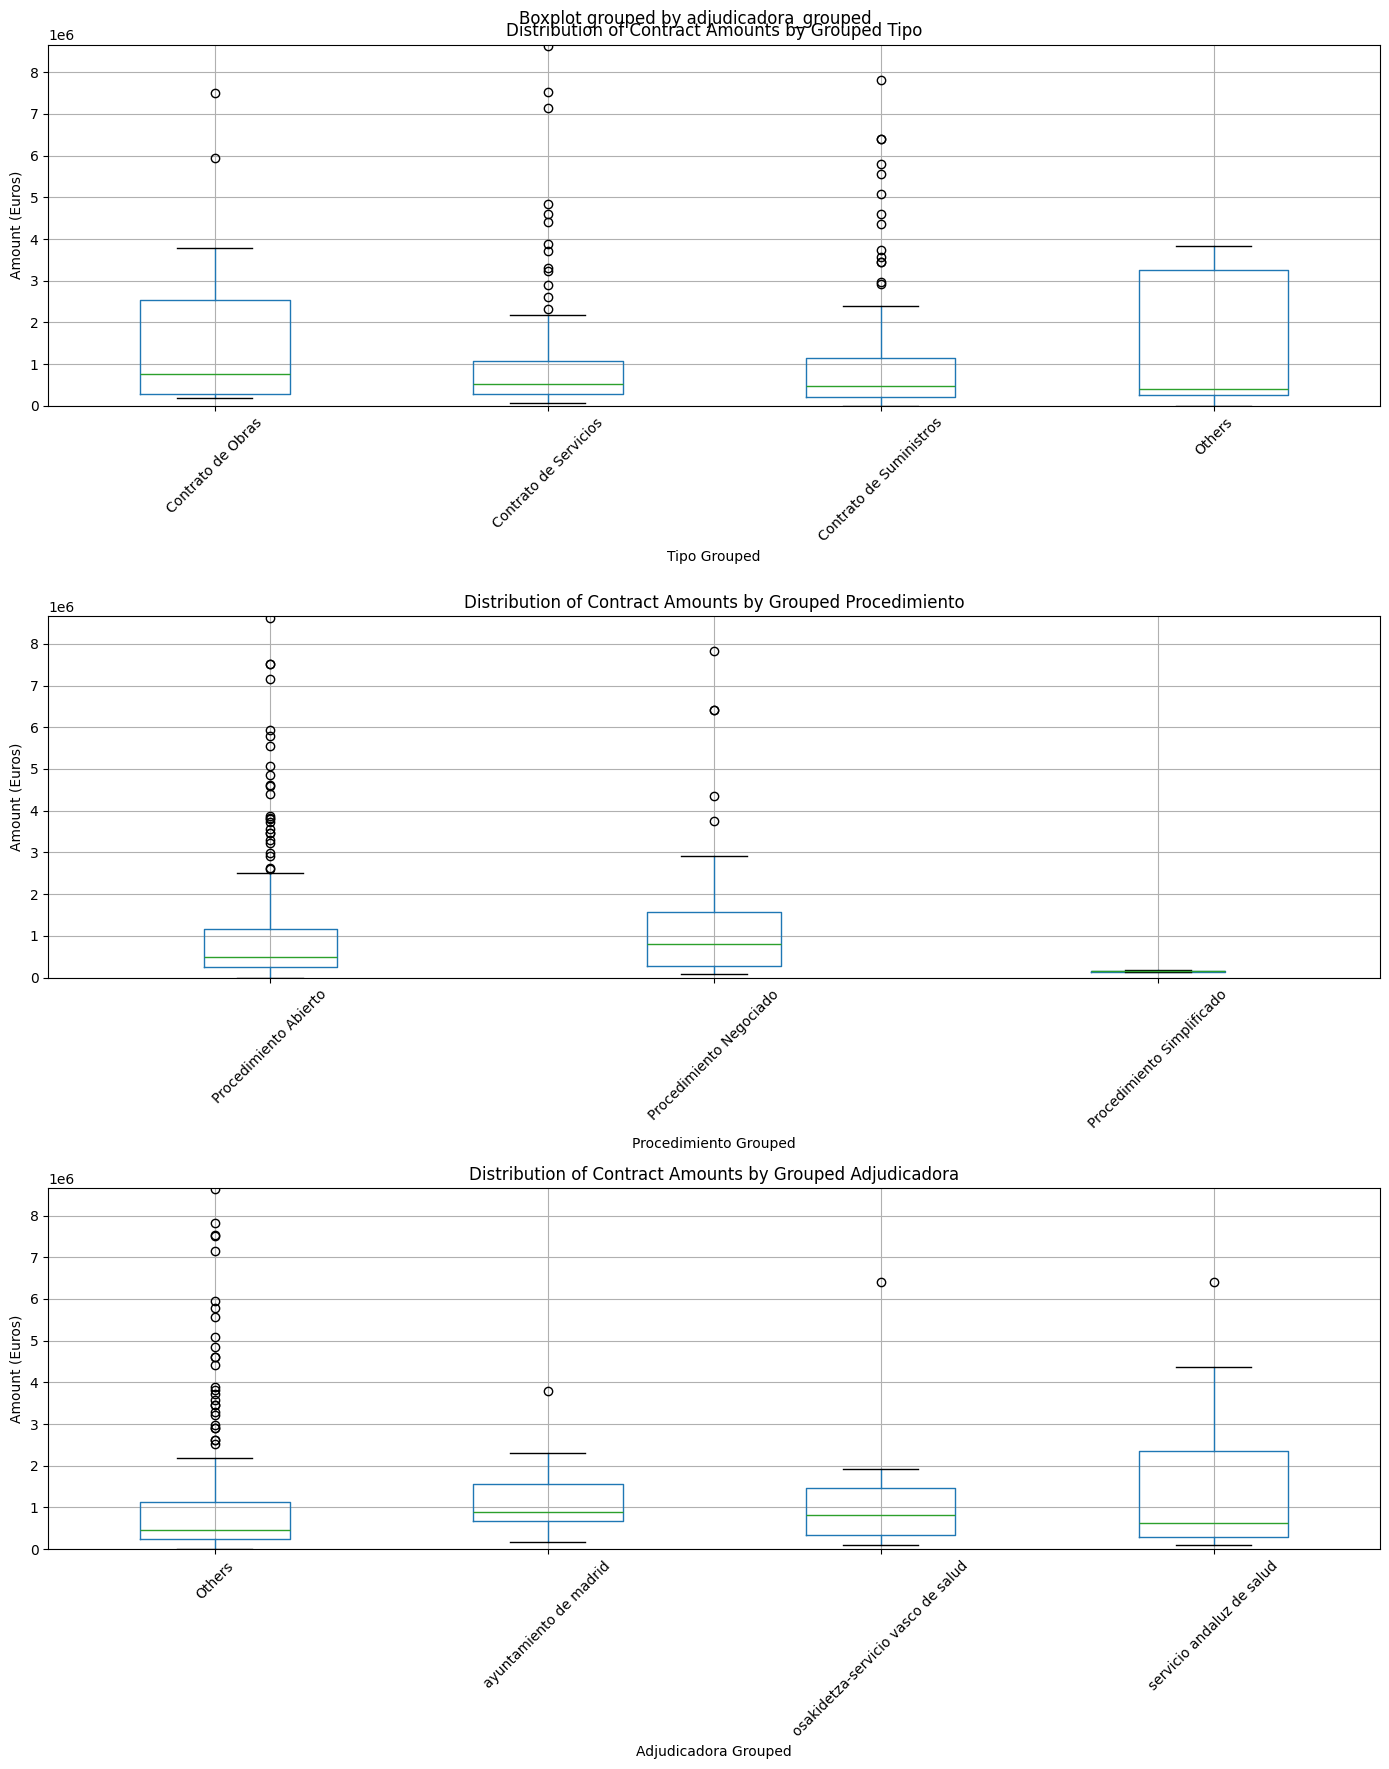

In [695]:
# Improved Box Plots for grouped categories

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# Distribution based on grouped Tipo
cleaned_data.boxplot(column='amount', by='tipo_grouped', ax=axes[0])
axes[0].set_title('Distribution of Contract Amounts by Grouped Tipo')
axes[0].set_xlabel('Tipo Grouped')
axes[0].set_ylabel('Amount (Euros)')
axes[0].set_ylim(0, cleaned_data['amount'].quantile(0.95))
axes[0].tick_params(axis='x', rotation=45)

# Distribution based on grouped Procedimiento
cleaned_data.boxplot(column='amount', by='procedimiento_grouped', ax=axes[1])
axes[1].set_title('Distribution of Contract Amounts by Grouped Procedimiento')
axes[1].set_xlabel('Procedimiento Grouped')
axes[1].set_ylabel('Amount (Euros)')
axes[1].set_ylim(0, cleaned_data['amount'].quantile(0.95))
axes[1].tick_params(axis='x', rotation=45)

# Distribution based on grouped Adjudicadora
cleaned_data.boxplot(column='amount', by='adjudicadora_grouped', ax=axes[2])
axes[2].set_title('Distribution of Contract Amounts by Grouped Adjudicadora')
axes[2].set_xlabel('Adjudicadora Grouped')
axes[2].set_ylabel('Amount (Euros)')
axes[2].set_ylim(0, cleaned_data['amount'].quantile(0.95))
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [696]:
# Identifying the ten most frequent classes for Adjudicadora
top_10_adjudicadoras = cleaned_data['adjudicadora'].value_counts().nlargest(5).index

# Creating a new class 'Others' for less frequent classes in Adjudicadora
cleaned_data['adjudicadora_grouped'] = cleaned_data['adjudicadora'].apply(lambda x: x if x in top_10_adjudicadoras else 'Others')

# Verifying the new grouping
adjudicadora_grouped_counts = cleaned_data['adjudicadora_grouped'].value_counts()
adjudicadora_grouped_counts

adjudicadora_grouped
Others                                286
servicio andaluz de salud              26
ayuntamiento de madrid                 15
osakidetza-servicio vasco de salud     12
servicio madrileño de salud            11
nan                                     7
Name: count, dtype: int64

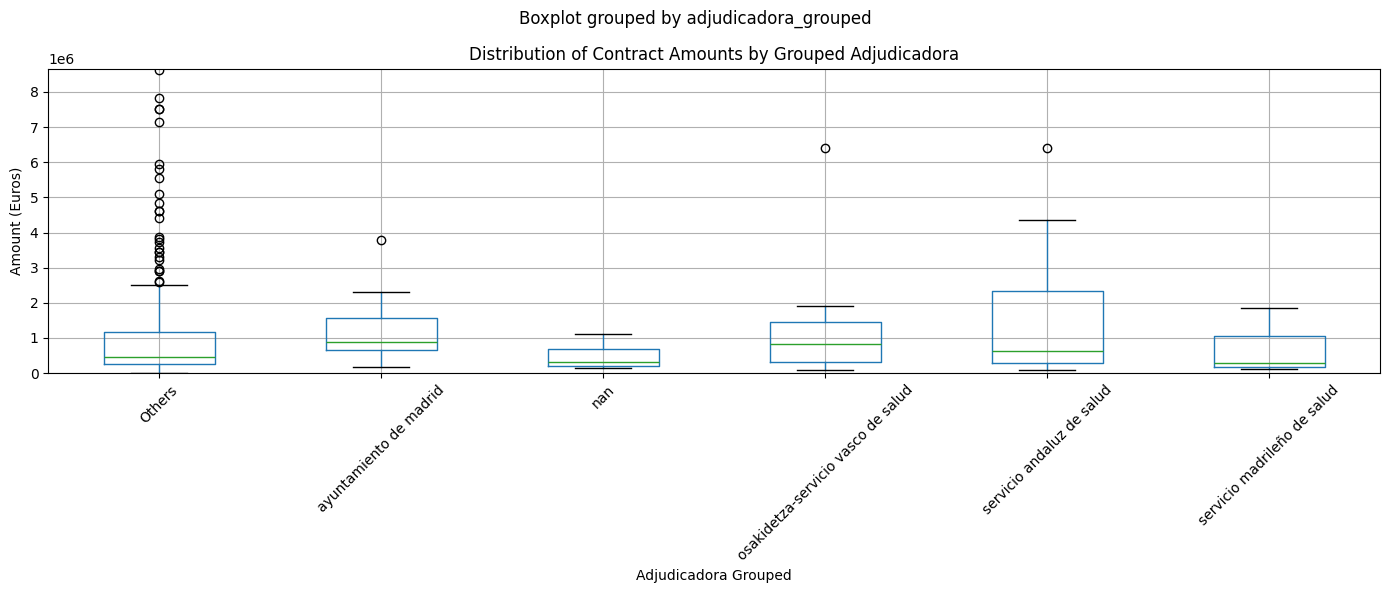

In [697]:
# Improved Box Plot for grouped Adjudicadora with 10 most frequent classes

fig, ax = plt.subplots(figsize=(14, 6))

# Distribution based on grouped Adjudicadora (10 most frequent + Others)
cleaned_data.boxplot(column='amount', by='adjudicadora_grouped', ax=ax)
ax.set_title('Distribution of Contract Amounts by Grouped Adjudicadora')
ax.set_xlabel('Adjudicadora Grouped')
ax.set_ylabel('Amount (Euros)')
ax.set_ylim(0, cleaned_data['amount'].quantile(0.95))
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### LEVENSHTEIN

In [698]:
from difflib import SequenceMatcher

def levenshtein_distance(a, b):
    if len(a) < len(b):
        return levenshtein_distance(b, a)
    
    if len(b) == 0:
        return len(a)
    
    previous_row = range(len(b) + 1)
    for i, c1 in enumerate(a):
        current_row = [i + 1]
        for j, c2 in enumerate(b):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

def normalize_company_name(name):
    return str(name).strip().lower()

def calculate_frequencies(df, column_name='adjudicadora'):
    normalized_names = df[column_name].apply(normalize_company_name)
    unique_names = normalized_names.unique()
    
    frequencies = []
    
    for target_name in unique_names:
        count = 0
        for name in normalized_names:
            if levenshtein_distance(name, target_name) <= 3:
                count += 1
        frequencies.append((target_name, count))
    
    frequency_df = pd.DataFrame(frequencies, columns=['adjudicadora', 'frequency'])
    return frequency_df

# Calculate frequencies
frequencies_df = calculate_frequencies(cleaned_data, column_name='adjudicadora')

# Sort frequencies and identify top 10
top_10_adjudicadoras_levenshtein = frequencies_df.sort_values(by='frequency', ascending=False).head(10)['adjudicadora'].tolist()

# Group data based on new top 10
cleaned_data['adjudicadora_grouped_levenshtein'] = cleaned_data['adjudicadora'].apply(
    lambda x: normalize_company_name(x) if normalize_company_name(x) in top_10_adjudicadoras_levenshtein else 'Others'
)

# Verifying the new grouping
adjudicadora_grouped_levenshtein_counts = cleaned_data['adjudicadora_grouped_levenshtein'].value_counts()
adjudicadora_grouped_levenshtein_counts

adjudicadora_grouped_levenshtein
Others                                                                                   268
servicio andaluz de salud                                                                 26
ayuntamiento de madrid                                                                    15
osakidetza-servicio vasco de salud                                                        12
servicio madrileño de salud                                                               11
nan                                                                                        7
axencia para a modernización tecnolóxica de galicia                                        5
ayuntamiento de ávila                                                                      4
consejeria de sanidad servicio madrileño de salud hospital universitario severo ochoa      4
ayuntamiento de reus                                                                       4
ayuntamiento de león                 

In [699]:
def levenshtein_distance(a, b):
    """
    Calculates the Levenshtein distance between two strings.
    """
    if len(a) < len(b):
        return levenshtein_distance(b, a)
    
    if len(b) == 0:
        return len(a)
    
    previous_row = range(len(b) + 1)
    for i, c1 in enumerate(a):
        current_row = [i + 1]
        for j, c2 in enumerate(b):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

def normalize_string(name):
    """
    Normalizes a string by stripping leading/trailing spaces
    and converting to lowercase.
    """
    return str(name).strip().lower()

def find_representative(names):
    """
    Finds a representative name for a group of similar names.
    """
    # For simplicity, we can choose the first name in the list as the representative
    return names[0]

def standardize_strings(df, column_name, distance_threshold=3):
    """
    Standardizes company names in the DataFrame, considering case insensitivity,
    leading/trailing spaces, and allowing for up to three character differences.
    """
    normalized_names = df[column_name].apply(normalize_string)
    unique_names = normalized_names.unique()
    
    # Create a mapping from normalized name to a representative name
    representative_map = {}
    for name in unique_names:
        found = False
        for rep in representative_map:
            if levenshtein_distance(name, rep) <= distance_threshold:
                representative_map[name] = representative_map[rep]
                found = True
                break
        if not found:
            representative_map[name] = name
    
    # Map the original names to their representatives
    standardized_names = normalized_names.map(representative_map)
    
    # Replace the original column with standardized names
    df[column_name] = standardized_names
    
    return df

In [700]:
standardized_df = standardize_strings(cleaned_data, column_name='adjudicadora')

# Verifying the standardization
standardized_df['adjudicadora'].value_counts()

adjudicadora
servicio andaluz de salud                 26
ayuntamiento de madrid                    15
osakidetza-servicio vasco de salud        12
servicio madrileño de salud               11
nan                                        7
                                          ..
universidad de zaragoza                    1
osakidetza                                 1
diputación de girona                       1
servicio de salud de las illes balears     1
ayuntamiento de salamanca                  1
Name: count, Length: 207, dtype: int64

### Valid values company

In [701]:
standardized_df = standardize_strings(cleaned_data, column_name='company')

# Verifying the standardization
standardized_df['company'].value_counts()

company
life care s.l                                                                                                                                                      10
gilead sciences s.l                                                                                                                                                 4
serunion s.a                                                                                                                                                        4
ferrovial servicios s.a.                                                                                                                                            3
merck s.l                                                                                                                                                           3
                                                                                                                                                                  

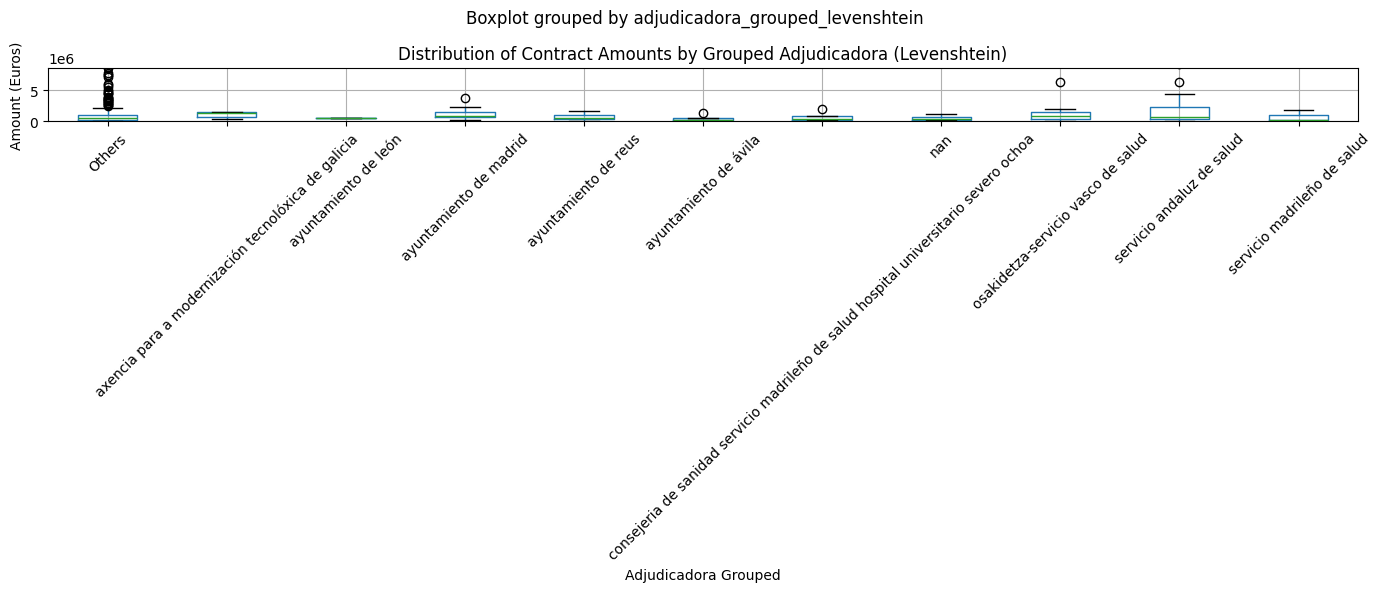

In [702]:
fig, ax = plt.subplots(figsize=(14, 6))

# Distribution based on grouped Adjudicadora with Levenshtein distance
cleaned_data.boxplot(column='amount', by='adjudicadora_grouped_levenshtein', ax=ax)
ax.set_title('Distribution of Contract Amounts by Grouped Adjudicadora (Levenshtein)')
ax.set_xlabel('Adjudicadora Grouped')
ax.set_ylabel('Amount (Euros)')
ax.set_ylim(0, cleaned_data['amount'].quantile(0.95))
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

check that sizes are expected

In [703]:
import json
# Group pdfs by mm_yyyy
grouped_data = data.groupby("mm_yyyy").size().reset_index(name='counts')
print(grouped_data)

# Read data/mm_yyyy_size.json
with open("data/mm_yyyy_size.json") as f:
    size_data = json.load(f)
print(size_data)

# Create a new column in grouped_data with the size of the pdfs
grouped_data["size"] = grouped_data["mm_yyyy"].map(size_data)
print(grouped_data)
sum(grouped_data["size"])
sum(grouped_data["counts"])
print(f"Total size of pdfs is: {sum(grouped_data['size'])} and total number of pdfs is: {sum(grouped_data['counts'])}")

    mm_yyyy  counts
0   01-2016      12
1   01-2017      14
2   01-2018      16
3   02-2016      11
4   02-2017      15
5   02-2018      15
6   03-2016       9
7   03-2017      13
8   03-2018      10
9   04-2016      12
10  04-2017      10
11  04-2018      12
12  05-2016       9
13  05-2017      10
14  05-2018      10
15  06-2016       9
16  06-2017      12
17  06-2018      14
18  07-2016       9
19  07-2017      14
20  07-2018      12
21  08-2016       8
22  08-2017       9
23  08-2018       6
24  09-2016      12
25  09-2017      13
26  09-2018       9
27  10-2016      12
28  10-2017      16
29  10-2018       7
30  11-2016      12
31  11-2017      15
32  11-2018       4
33  12-2016      13
34  12-2017      14
35  12-2018       2
{'01-2016': 12, '02-2016': 11, '03-2016': 9, '04-2016': 12, '05-2016': 9, '06-2016': 9, '07-2016': 9, '08-2016': 8, '09-2016': 12, '10-2016': 12, '11-2016': 12, '12-2016': 13, '01-2017': 14, '02-2017': 15, '03-2017': 13, '04-2017': 10, '05-2017': 10, '06-2017'

In [704]:
# Seleccionar la fila numero 60
print(data.iloc[60])

pdf                                           BOE-B-2016-26735.pdf
mm_yyyy                                                    06-2016
company          Telefónica Soluciones de Informática y Telecom...
amount                                                    137940.0
currency                                                     euros
adjudicadora            Conselleria de Hacienda y Modelo Económico
tipo                                                     Servicios
tramitacion                                              Ordinaria
procedimiento             Abierto varios criterios de adjudicación
model                                                         phi3
time                                                        303.68
Name: 60, dtype: object


# Compare contract amount across different years

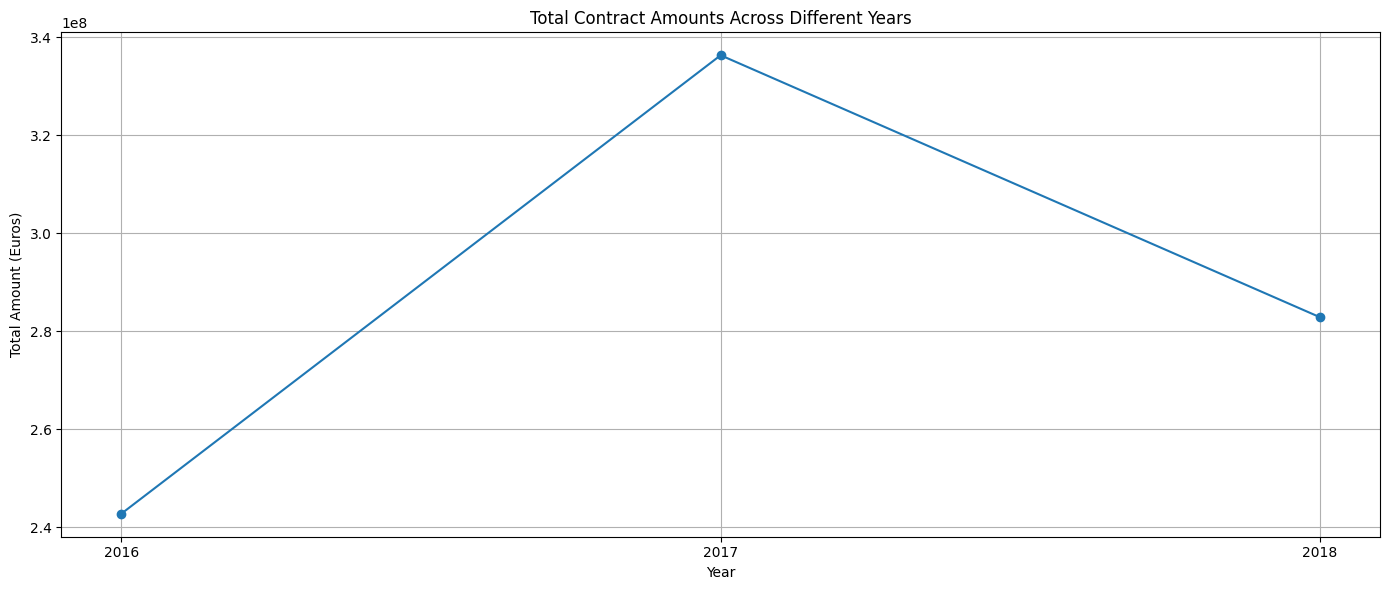

year
2016    2.427567e+08
2017    3.363390e+08
2018    2.828669e+08
Name: amount, dtype: float64


In [705]:
# Extracting year from the 'mm_yyyy' field
cleaned_data['year'] = cleaned_data['mm_yyyy'].dt.year

# Grouping data by year and calculating total contract amounts
yearly_amounts = cleaned_data.groupby('year')['amount'].sum()

# Visualizing total contract amounts across different years
plt.figure(figsize=(14, 6))
plt.plot(yearly_amounts.index, yearly_amounts.values, marker='o')
plt.title('Total Contract Amounts Across Different Years')
plt.xlabel('Year')
plt.ylabel('Total Amount (Euros)')
plt.grid(True)
plt.xticks(yearly_amounts.index)
plt.tight_layout()
plt.show()

# Display yearly amounts data for user
print(yearly_amounts)

# Descriptive analysis

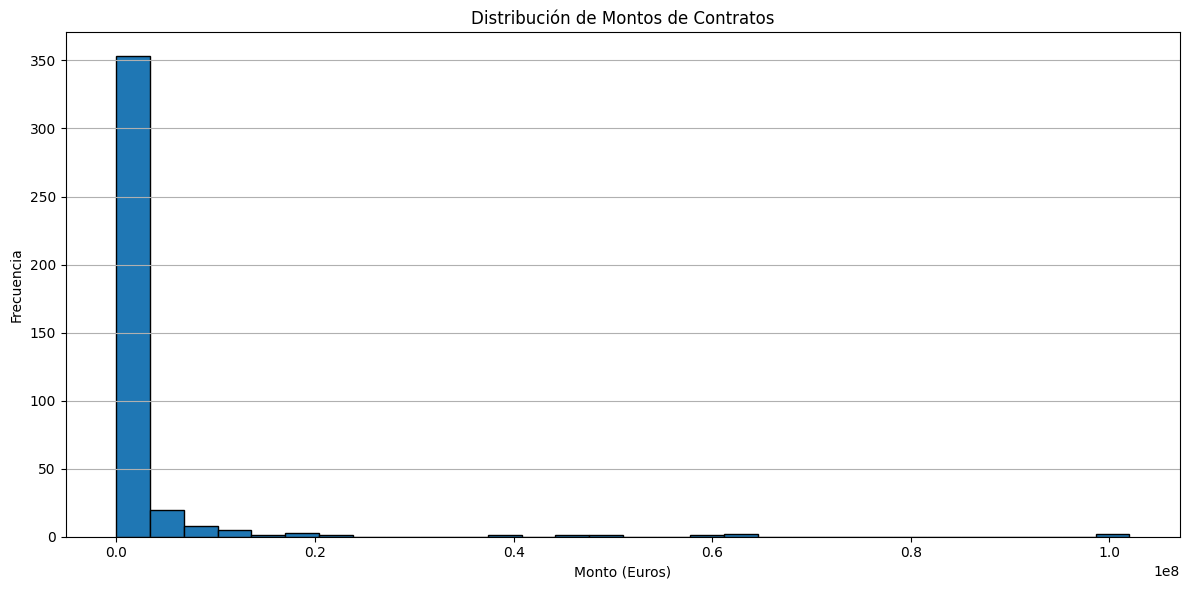

In [706]:
# Análisis 2: Distribución de Montos de Contratos
# Convertir los montos a formato numérico (asegurando que están en euros)
data['amount'] = pd.to_numeric(data['amount'], errors='coerce')

# Descripción estadística de los montos
amount_stats = data['amount'].describe()

# Graficar la distribución de montos
plt.figure(figsize=(12, 6))
plt.hist(data['amount'], bins=30, edgecolor='black')
plt.title('Distribución de Montos de Contratos')
plt.xlabel('Monto (Euros)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

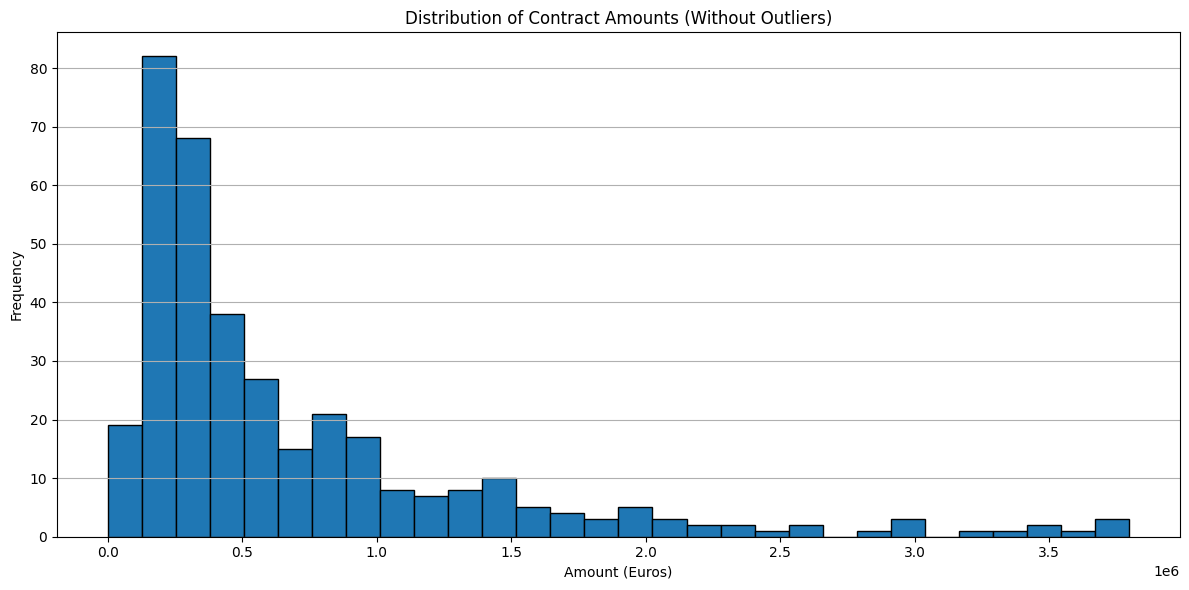

In [707]:
# Calculate the 90th percentile to identify the outlier
percentile_90 = np.percentile(data['amount'].dropna(), 90)

# Filter the data to exclude values above the 90th percentile
filtered_data = data[data['amount'] <= percentile_90]

# Create a new plot without the outliers
plt.figure(figsize=(12, 6))
plt.hist(filtered_data['amount'], bins=30, edgecolor='black')
plt.title('Distribution of Contract Amounts (Without Outliers)')
plt.xlabel('Amount (Euros)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1. Concentración de Montos:
    - La mayoría de los contratos se encuentran en el rango de 0 a 200,000 euros. Esto indica que la mayoría de las formalizaciones son de bajo a mediano valor.
  
2. Disminución Rápida:
    - Hay una disminución rápida en la frecuencia de contratos a medida que aumentan los montos. Los contratos con valores superiores a 1 millón de euros son significativamente menos frecuentes.

3. Distribución Asimétrica:
    - La distribución es asimétrica, con una cola a la derecha que sugiere la presencia de algunos contratos de mayor valor que son menos frecuentes pero impactan la media de los montos.

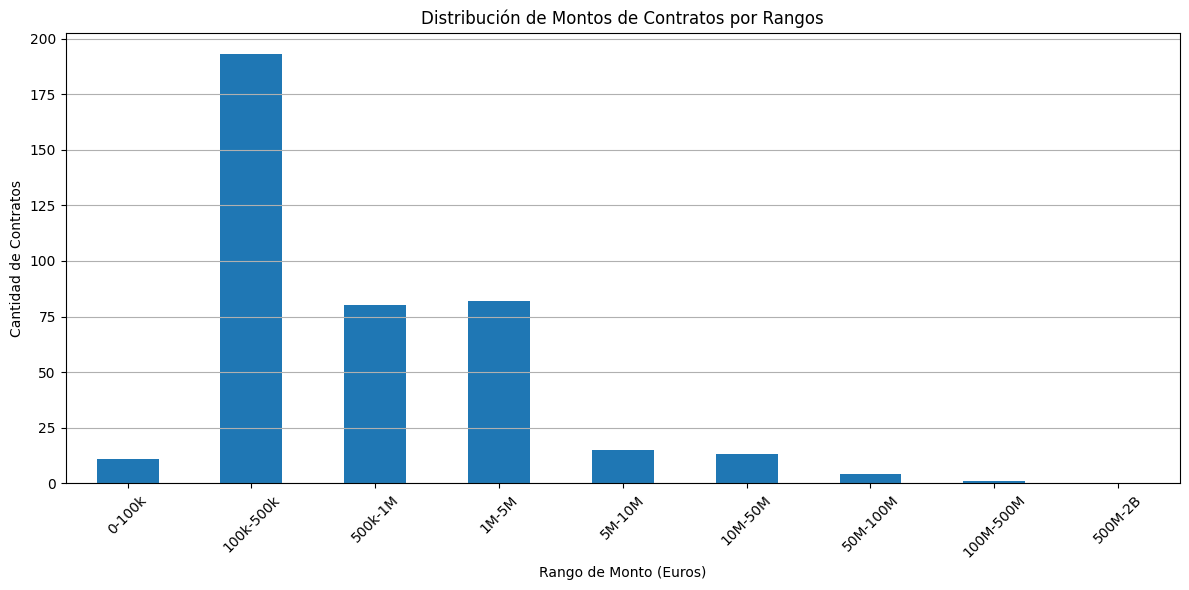

In [708]:
# Agrupar en rangos y graficar
bins = [0, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, 500000000, 2000000000]
labels = ['0-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-50M', '50M-100M', '100M-500M', '500M-2B']
data['amount_range'] = pd.cut(data['amount'], bins=bins, labels=labels, include_lowest=True)

amount_range_counts = data['amount_range'].value_counts().sort_index()

# Graficar la distribución por rangos de montos
plt.figure(figsize=(12, 6))
amount_range_counts.plot(kind='bar')
plt.title('Distribución de Montos de Contratos por Rangos')
plt.xlabel('Rango de Monto (Euros)')
plt.ylabel('Cantidad de Contratos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1. Rangos Dominantes:
    - El rango de 100,000 a 500,000 euros es el más frecuente, seguido por el rango de 500,000 a 1 millón de euros. Esto sugiere que la mayoría de los contratos se sitúan en un rango de valor moderado.
2. Poca Representación en Rangos Altos:
    - Hay muy pocos contratos en los rangos superiores a 10 millones de euros. Esto refuerza la observación de que la mayoría de las formalizaciones son de menor escala.
3. Representación Proporcional:
    - La gráfica muestra una caída progresiva en la frecuencia de contratos a medida que los montos aumentan, lo que indica una distribución que sigue una tendencia natural donde los grandes contratos son menos comunes.

```python
[
    {
        "file": "sumario-20150823.xml",
        "date": "23/08/2015",
        "departamentos": [
            {
                "departamento": "Nombre del departamento",
                "items": [
                    {
                        "id": "ID del item",
                        "urlPdf": "URL del PDF"
                    },
                    ...
                ]
            },
            ...
        ]
    },
    ...
]
```

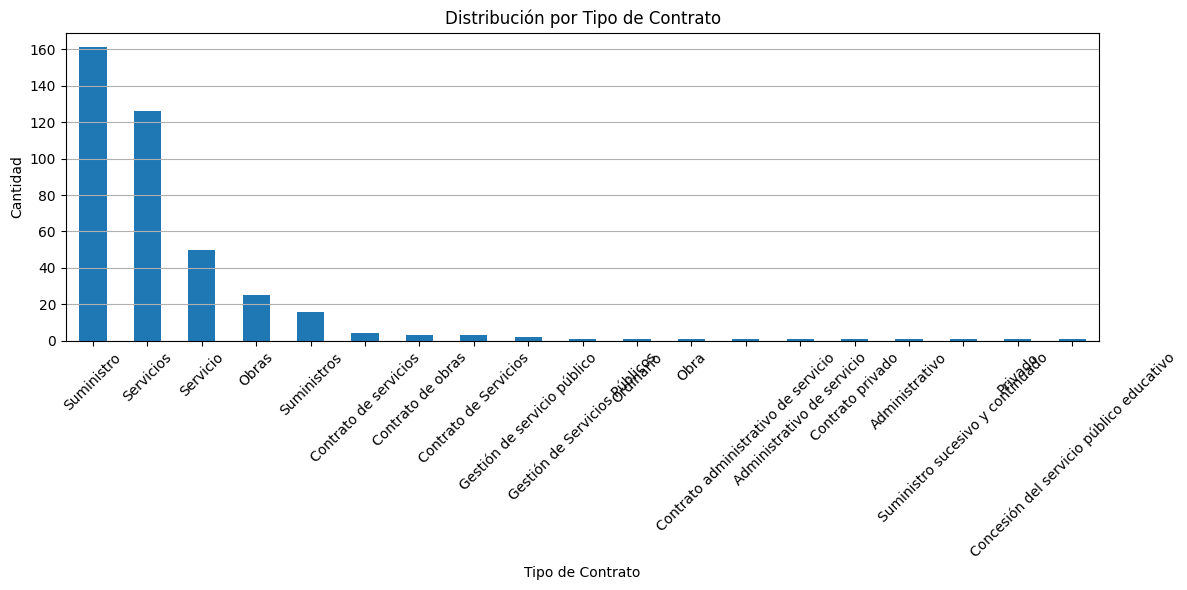

In [709]:
# Análisis 3: Análisis por Tipo de Contrato
# Contar la cantidad de cada tipo de contrato
tipo_counts = data['tipo'].value_counts()

# Graficar la distribución por tipo de contrato
plt.figure(figsize=(12, 6))
tipo_counts.plot(kind='bar')
plt.title('Distribución por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

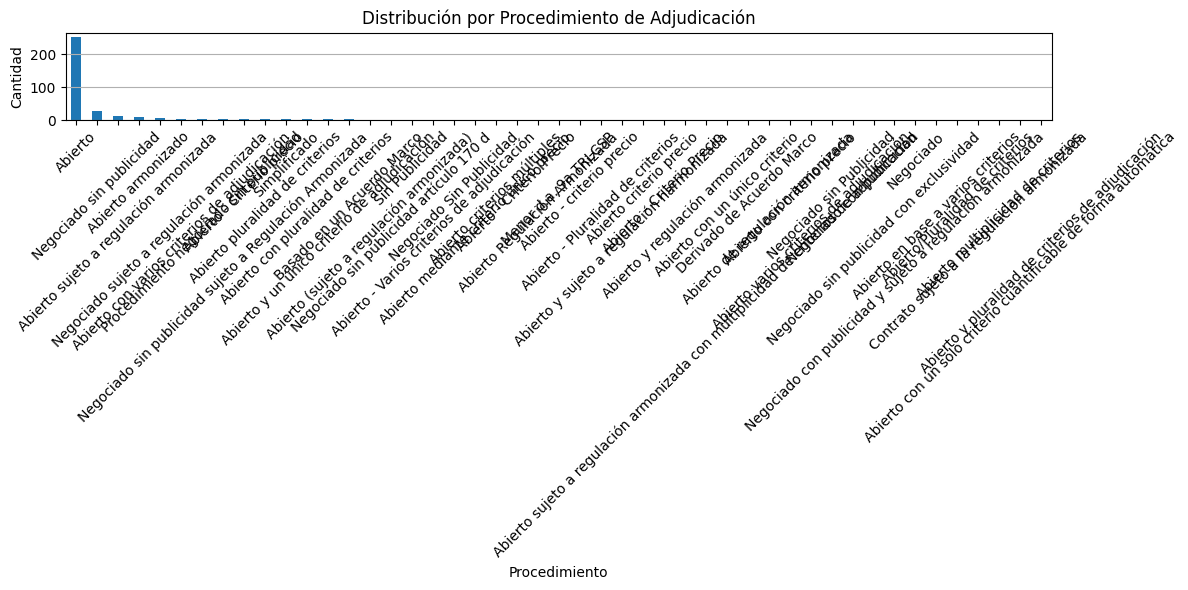

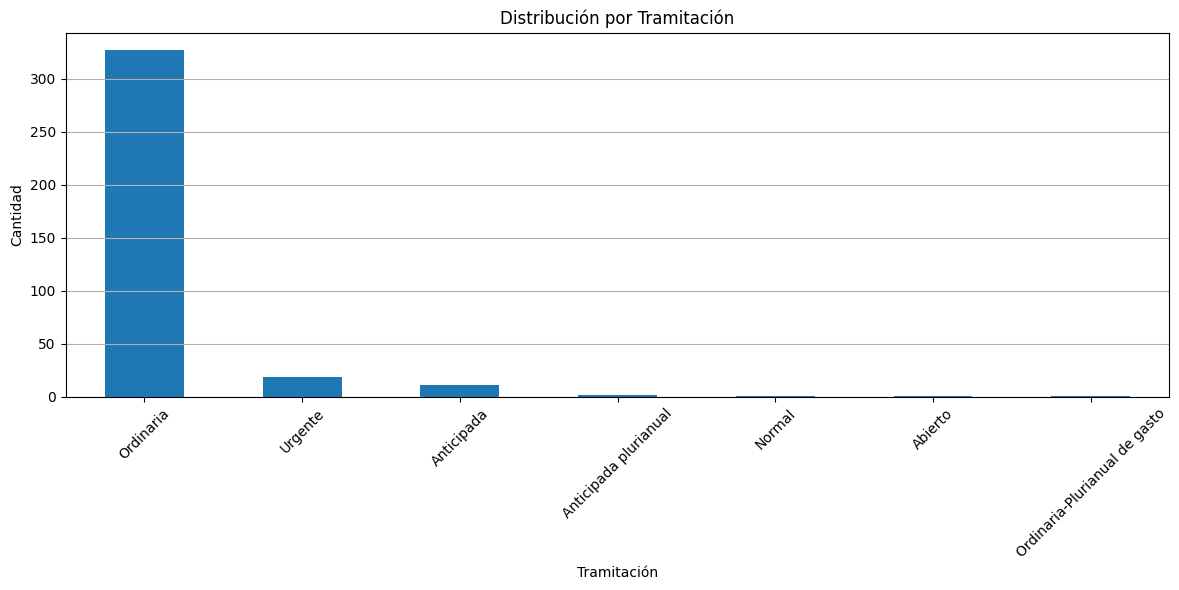

In [710]:
# Análisis 4: Procedimientos y Tramitación
# Contar la cantidad de cada procedimiento
procedimiento_counts = data['procedimiento'].value_counts()
tramitacion_counts = data['tramitacion'].value_counts()

# Graficar la distribución por procedimiento
plt.figure(figsize=(12, 6))
procedimiento_counts.plot(kind='bar')
plt.title('Distribución por Procedimiento de Adjudicación')
plt.xlabel('Procedimiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Graficar la distribución por tramitación
plt.figure(figsize=(12, 6))
tramitacion_counts.plot(kind='bar')
plt.title('Distribución por Tramitación')
plt.xlabel('Tramitación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

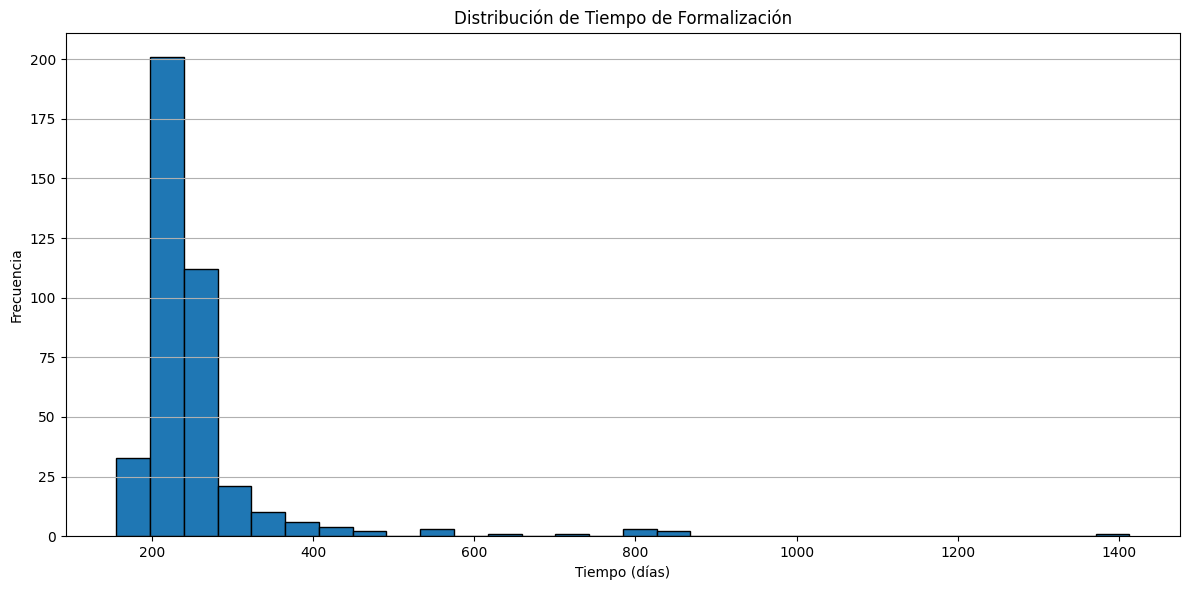

In [711]:
# Análisis 5: Tiempo de Formalización
# Descripción estadística del tiempo de formalización
data['time'] = pd.to_numeric(data['time'], errors='coerce')
time_stats = data['time'].describe()

# Graficar la distribución de tiempo de formalización
plt.figure(figsize=(12, 6))
plt.hist(data['time'], bins=30, edgecolor='black')
plt.title('Distribución de Tiempo de Formalización')
plt.xlabel('Tiempo (días)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [712]:
# Mostrar estadísticas resumen
amount_stats, time_stats

(count    3.990000e+02
 mean     2.656762e+06
 std      9.885912e+06
 min      0.000000e+00
 25%      2.442179e+05
 50%      4.823916e+05
 75%      1.195336e+06
 max      1.020000e+08
 Name: amount, dtype: float64,
 count     400.000000
 mean      257.713050
 std       106.276973
 min       155.930000
 25%       221.695000
 50%       234.915000
 75%       256.292500
 max      1412.890000
 Name: time, dtype: float64)

# Temporal Analysis

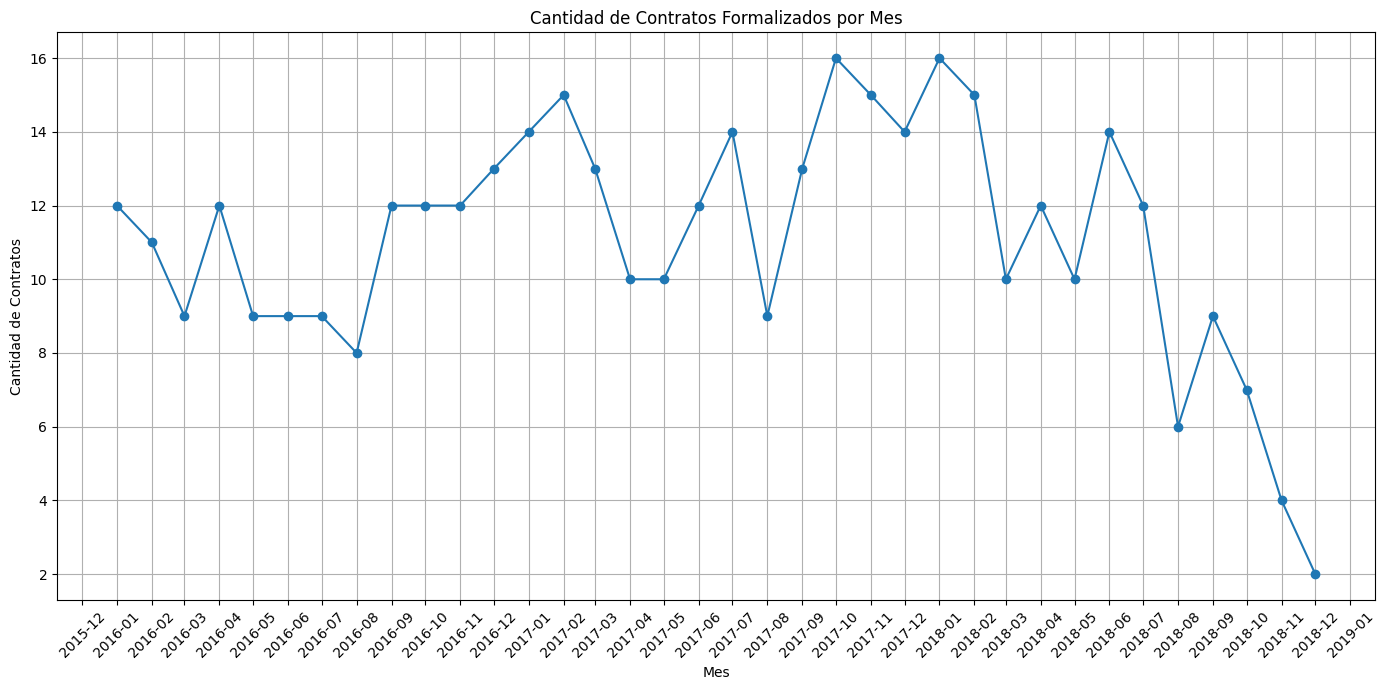

In [713]:
import matplotlib.dates as mdates
# Suponiendo que data es tu DataFrame y 'mm_yyyy' es la columna que contiene las fechas
# Convertir la columna 'mm_yyyy' a datetime con el formato correcto
data['mm_yyyy'] = pd.to_datetime(data['mm_yyyy'], format='%m-%Y')

# Agrupar los datos por mes y contar la cantidad de contratos
monthly_counts = data['mm_yyyy'].dt.to_period('M').value_counts().sort_index()

# Convertir a un formato que permita graficar
monthly_counts = monthly_counts.to_timestamp()

# Graficar la cantidad de contratos por mes
plt.figure(figsize=(14, 7))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.title('Cantidad de Contratos Formalizados por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Contratos')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

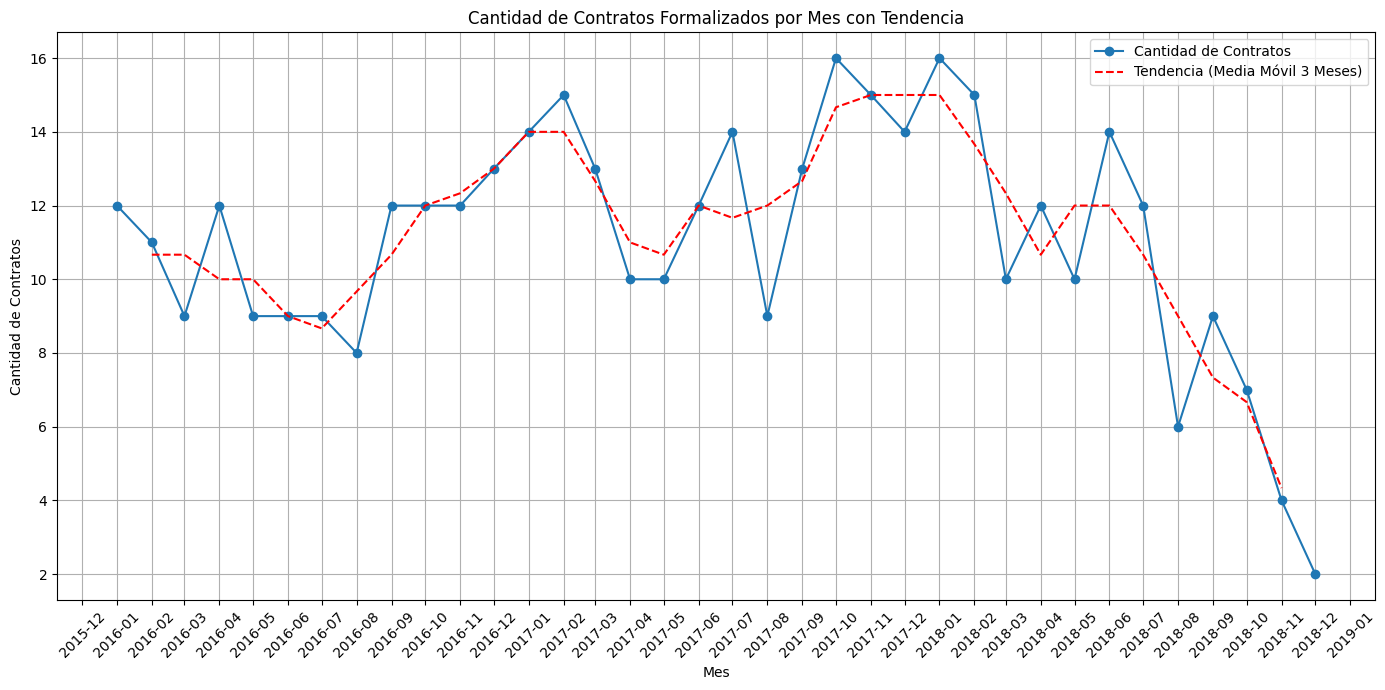

In [714]:
import matplotlib.dates as mdates
# Agregar una tendencia utilizando una media móvil de 3 meses
monthly_counts_rolling = monthly_counts.rolling(window=3, center=True).mean()

# Graficar con la media móvil
plt.figure(figsize=(14, 7))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', label='Cantidad de Contratos')
plt.plot(monthly_counts_rolling.index, monthly_counts_rolling.values, color='r', linestyle='--', label='Tendencia (Media Móvil 3 Meses)')
plt.title('Cantidad de Contratos Formalizados por Mes con Tendencia')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Contratos')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.legend()
plt.tight_layout()
plt.show()

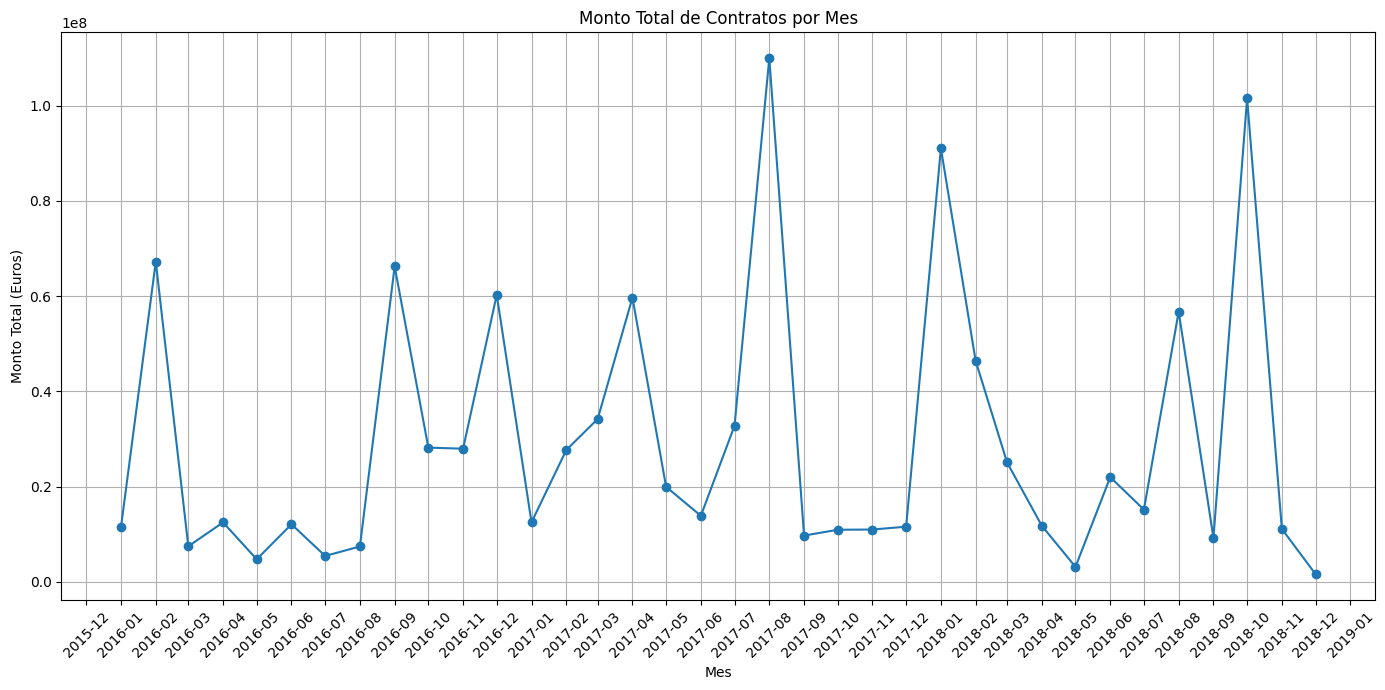

In [715]:

# Agrupar los datos por mes y sumar los montos de los contratos por mes
monthly_amounts = data.groupby(data['mm_yyyy'].dt.to_period('M'))['amount'].sum().sort_index()

# Convertir a un formato que permita graficar
monthly_amounts = monthly_amounts.to_timestamp()

# Graficar los montos de contratos por mes
plt.figure(figsize=(14, 7))
plt.plot(monthly_amounts.index, monthly_amounts.values, marker='o', linestyle='-')
plt.title('Monto Total de Contratos por Mes')
plt.xlabel('Mes')
plt.ylabel('Monto Total (Euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

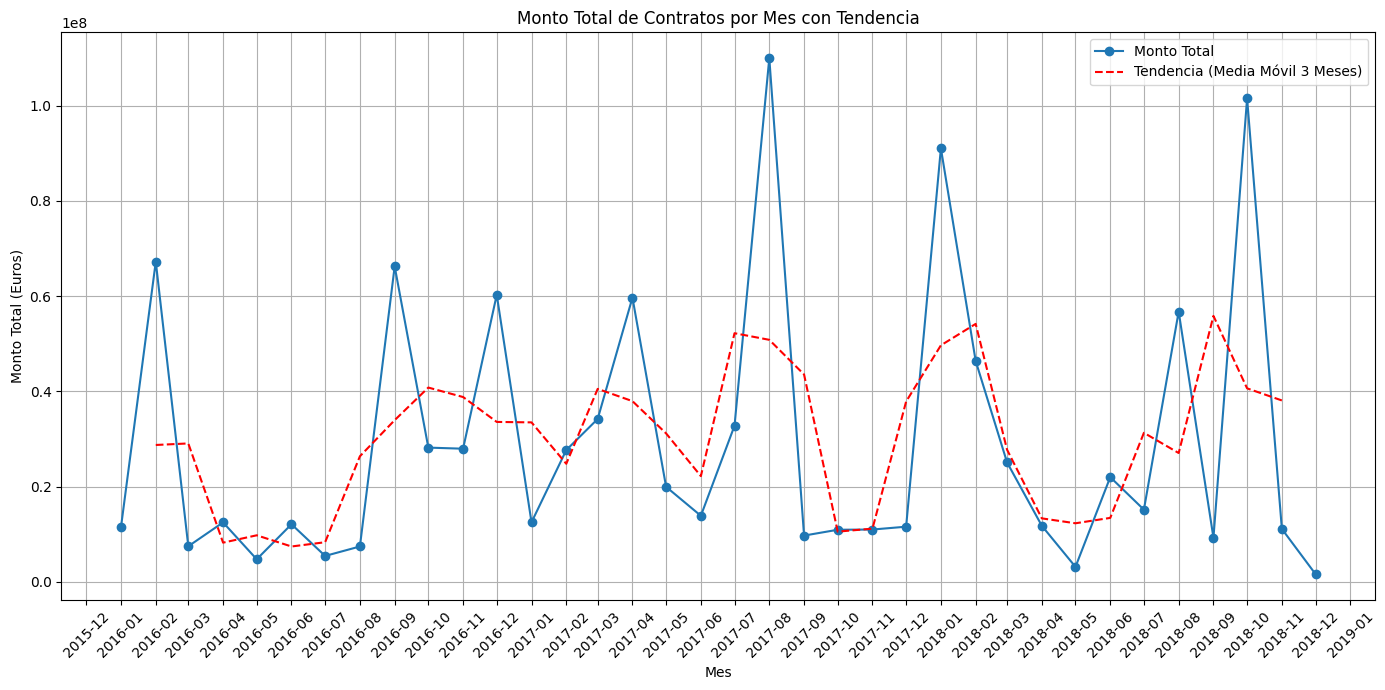

In [716]:
# Agregar una tendencia utilizando una media móvil de 3 meses
monthly_amounts_rolling = monthly_amounts.rolling(window=3, center=True).mean()

# Graficar con la media móvil
plt.figure(figsize=(14, 7))
plt.plot(monthly_amounts.index, monthly_amounts.values, marker='o', linestyle='-', label='Monto Total')
plt.plot(monthly_amounts_rolling.index, monthly_amounts_rolling.values, color='r', linestyle='--', label='Tendencia (Media Móvil 3 Meses)')
plt.title('Monto Total de Contratos por Mes con Tendencia')
plt.xlabel('Mes')
plt.ylabel('Monto Total (Euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.legend()
plt.tight_layout()
plt.show()

In [717]:
# Resumen estadístico de los montos de contratos por mes
monthly_amounts.describe()

count    3.600000e+01
mean     2.944578e+07
std      2.882952e+07
min      1.625811e+06
25%      1.097640e+07
50%      1.451877e+07
75%      3.725801e+07
max      1.100052e+08
Name: amount, dtype: float64

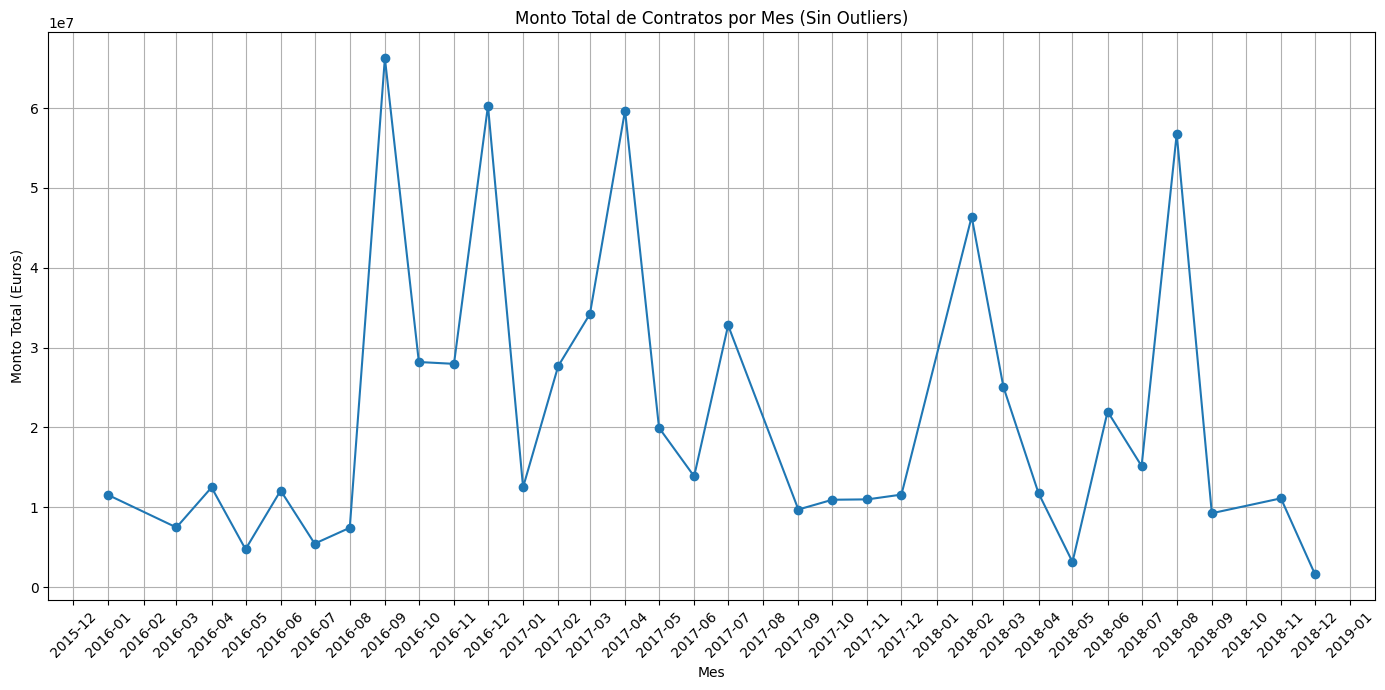

In [718]:
# Identificar y eliminar el outlier
# Calcular el percentil 99 para identificar el outlier
percentile_99_amount = np.percentile(monthly_amounts, 90)

# Filtrar los datos para excluir los valores por encima del percentil 99
filtered_monthly_amounts = monthly_amounts[monthly_amounts <= percentile_99_amount]

# Graficar los montos de contratos por mes sin el outlier
plt.figure(figsize=(14, 7))
plt.plot(filtered_monthly_amounts.index, filtered_monthly_amounts.values, marker='o', linestyle='-')
plt.title('Monto Total de Contratos por Mes (Sin Outliers)')
plt.xlabel('Mes')
plt.ylabel('Monto Total (Euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

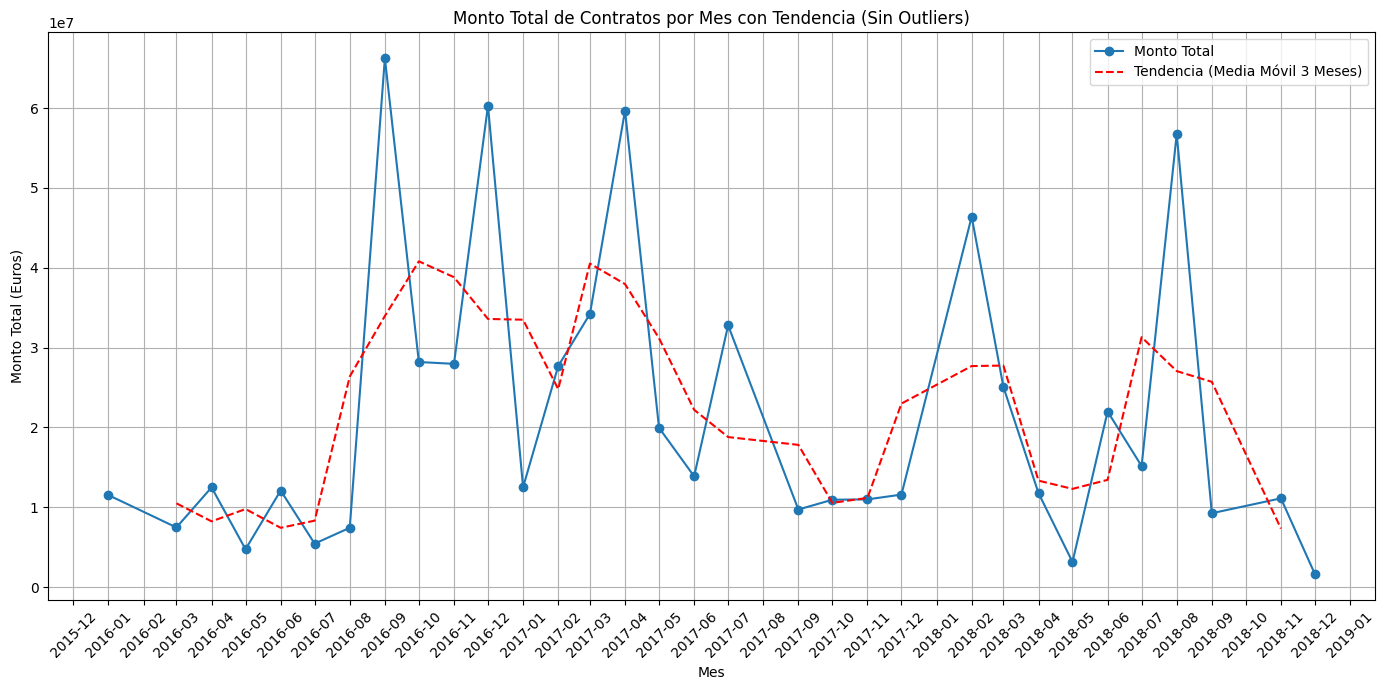

In [719]:
# Agregar una tendencia utilizando una media móvil de 3 meses
filtered_monthly_amounts_rolling = filtered_monthly_amounts.rolling(window=3, center=True).mean()

# Graficar con la media móvil
plt.figure(figsize=(14, 7))
plt.plot(filtered_monthly_amounts.index, filtered_monthly_amounts.values, marker='o', linestyle='-', label='Monto Total')
plt.plot(filtered_monthly_amounts_rolling.index, filtered_monthly_amounts_rolling.values, color='r', linestyle='--', label='Tendencia (Media Móvil 3 Meses)')
plt.title('Monto Total de Contratos por Mes con Tendencia (Sin Outliers)')
plt.xlabel('Mes')
plt.ylabel('Monto Total (Euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.legend()
plt.tight_layout()
plt.show()

In [720]:
# Resumen estadístico de los montos de contratos por mes sin outlier
filtered_monthly_amounts.describe()

count    3.200000e+01
mean     2.156751e+07
std      1.812753e+07
min      1.625811e+06
25%      1.063421e+07
50%      1.249780e+07
75%      2.802241e+07
max      6.626375e+07
Name: amount, dtype: float64

# Compare llama3 and phi3

In [721]:
data = pd.read_csv("comparison.csv")

In [722]:
# remove rows with time greater than 900
data_outliers = data[data['time'] <= 900]

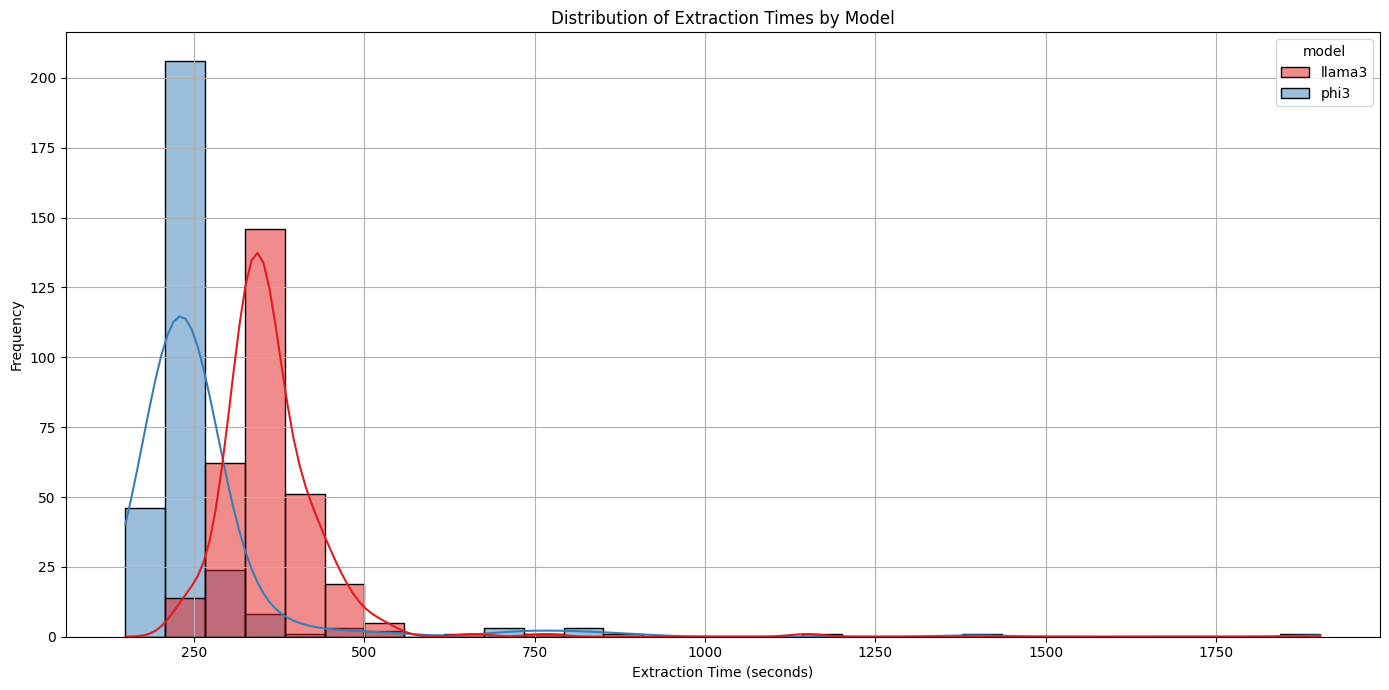

In [723]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of extraction times for both models
plt.figure(figsize=(14, 7))
sns.histplot(data=data, x='time', hue='model', kde=True, bins=30, palette='Set1')
plt.title('Distribution of Extraction Times by Model')
plt.xlabel('Extraction Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


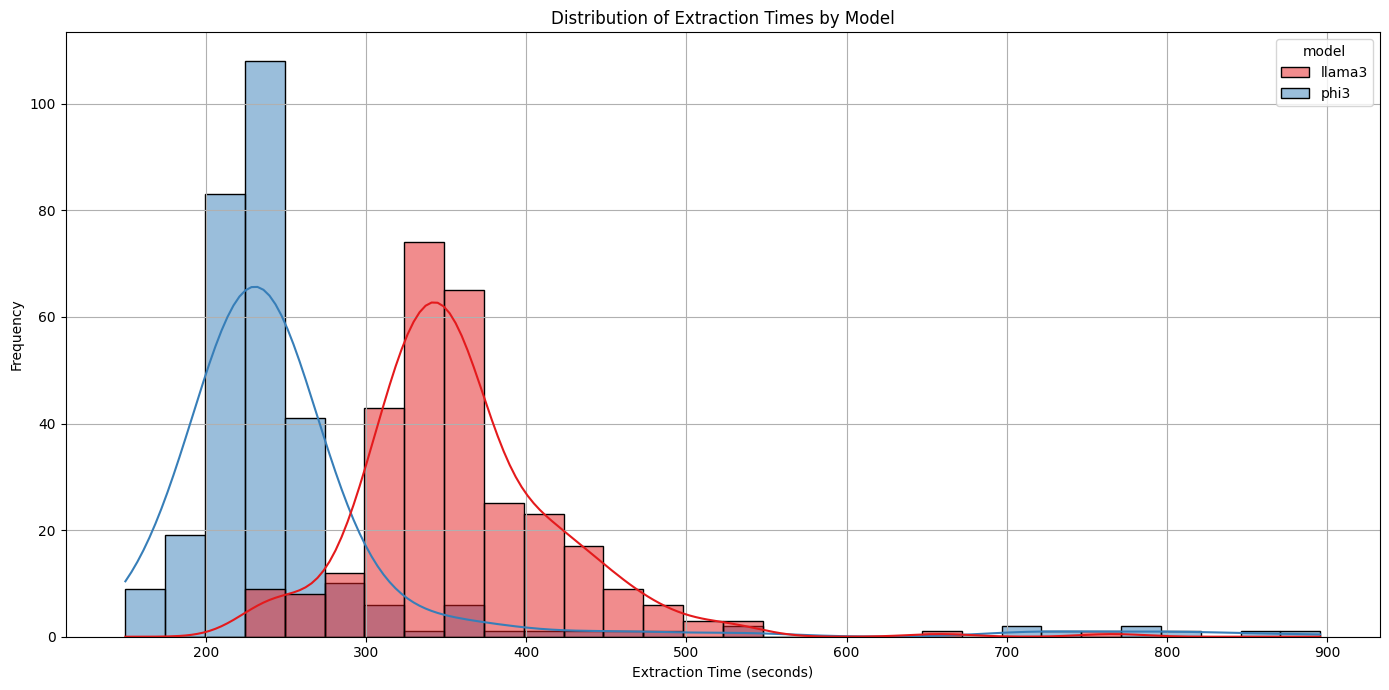

In [724]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of extraction times for both models
plt.figure(figsize=(14, 7))
sns.histplot(data=data_outliers, x='time', hue='model', kde=True, bins=30, palette='Set1')
plt.title('Distribution of Extraction Times by Model')
plt.xlabel('Extraction Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


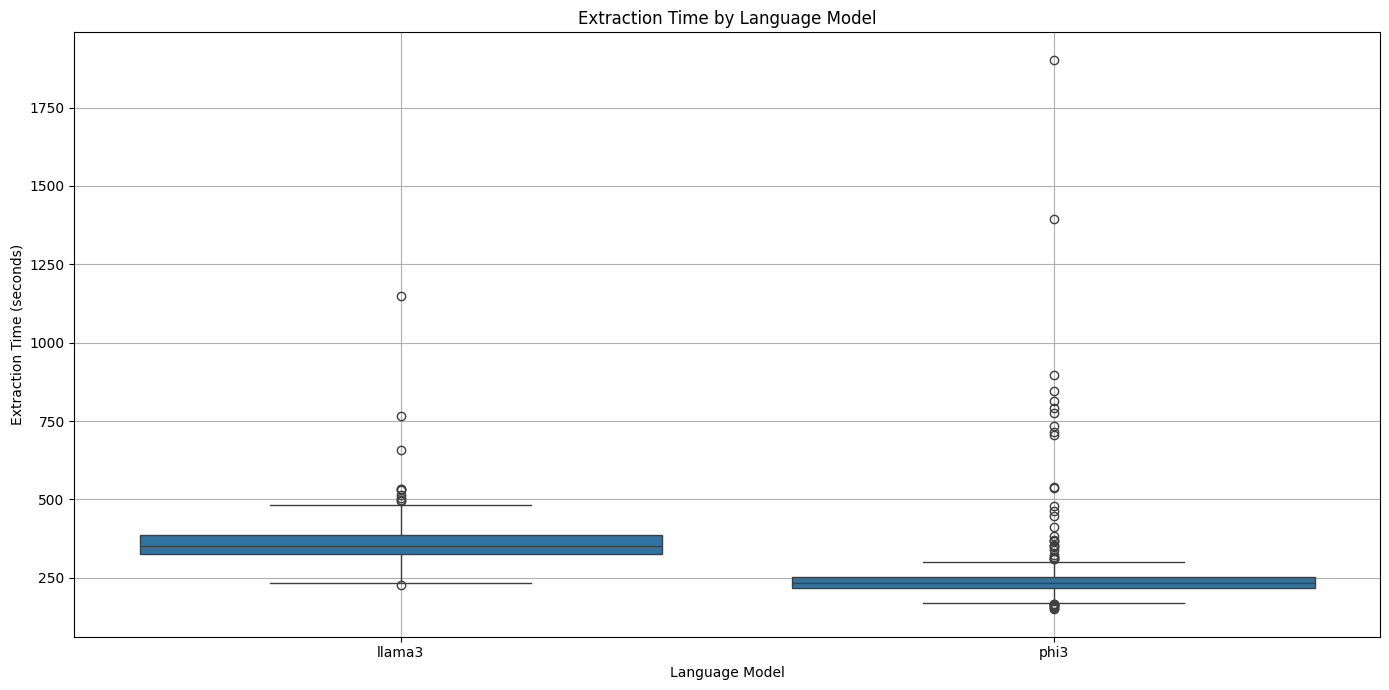

In [725]:
# Calculate the descriptive statistics of the extraction time by model
model_time_stats = data.groupby('model')['time'].describe()

# Plot the average extraction time by language model
plt.figure(figsize=(14, 7))
sns.boxplot(x='model', y='time', data=data)
plt.title('Extraction Time by Language Model')
plt.xlabel('Language Model')
plt.ylabel('Extraction Time (seconds)')
plt.grid(True)
plt.tight_layout()
plt.show()

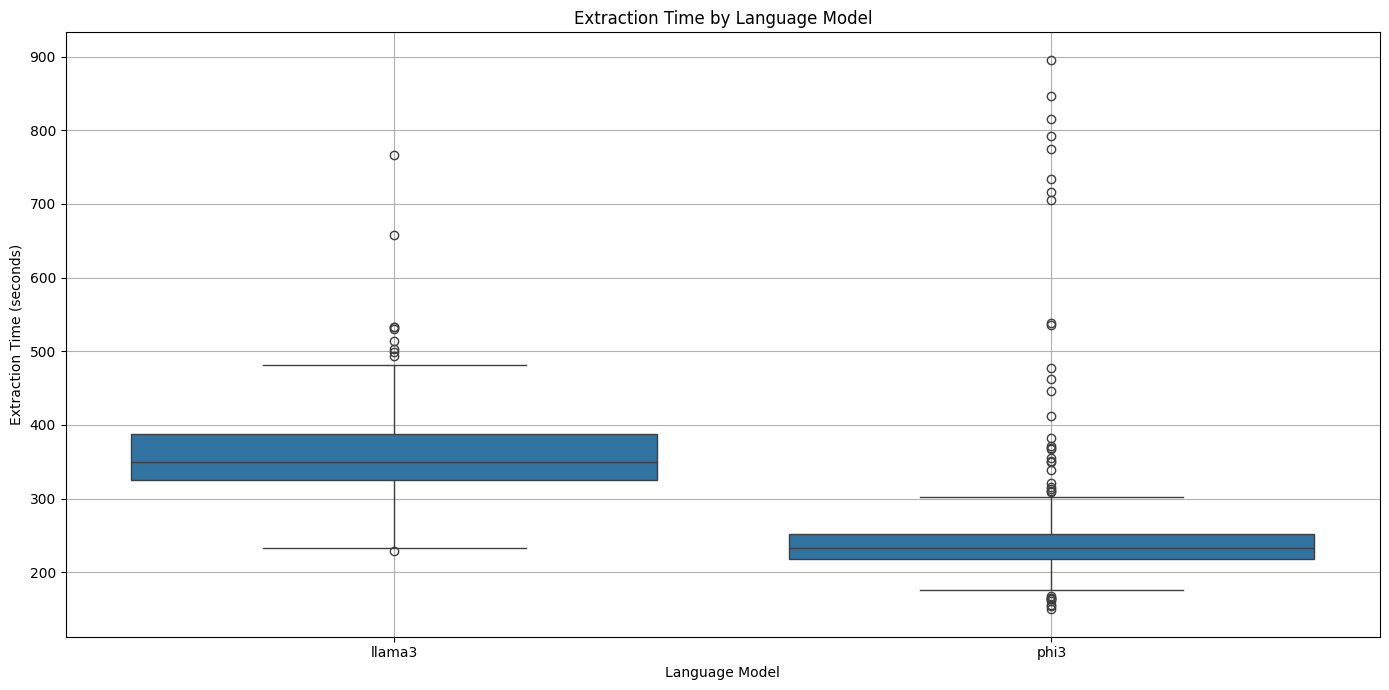

In [726]:
# Calculate the descriptive statistics of the extraction time by model
model_time_stats = data.groupby('model')['time'].describe()

# Plot the average extraction time by language model
plt.figure(figsize=(14, 7))
sns.boxplot(x='model', y='time', data=data_outliers)
plt.title('Extraction Time by Language Model')
plt.xlabel('Language Model')
plt.ylabel('Extraction Time (seconds)')
plt.grid(True)
plt.tight_layout()
plt.show()

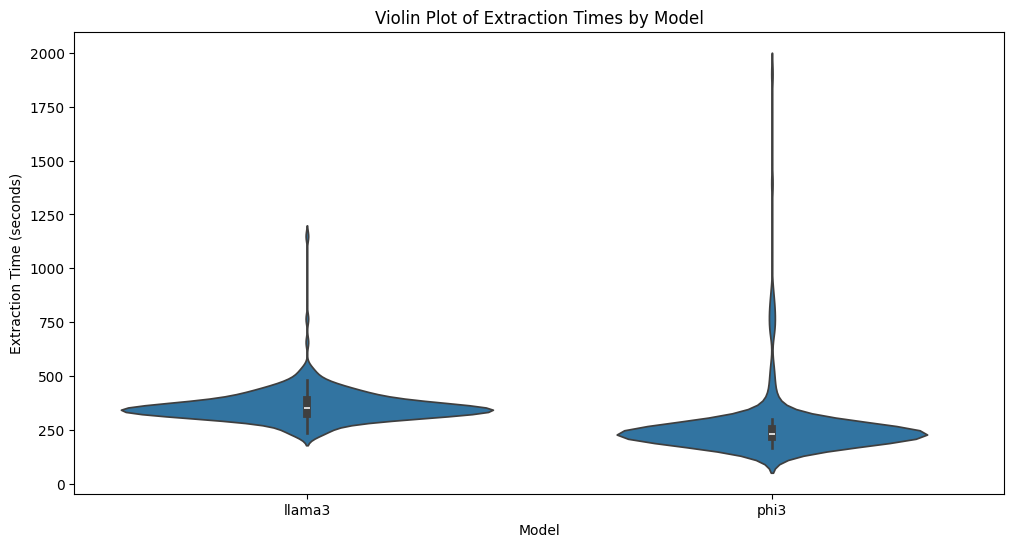

In [727]:
# Violin plot of extraction times
plt.figure(figsize=(12, 6))
sns.violinplot(x='model', y='time', data=data)
plt.title('Violin Plot of Extraction Times by Model')
plt.xlabel('Model')
plt.ylabel('Extraction Time (seconds)')
plt.show()

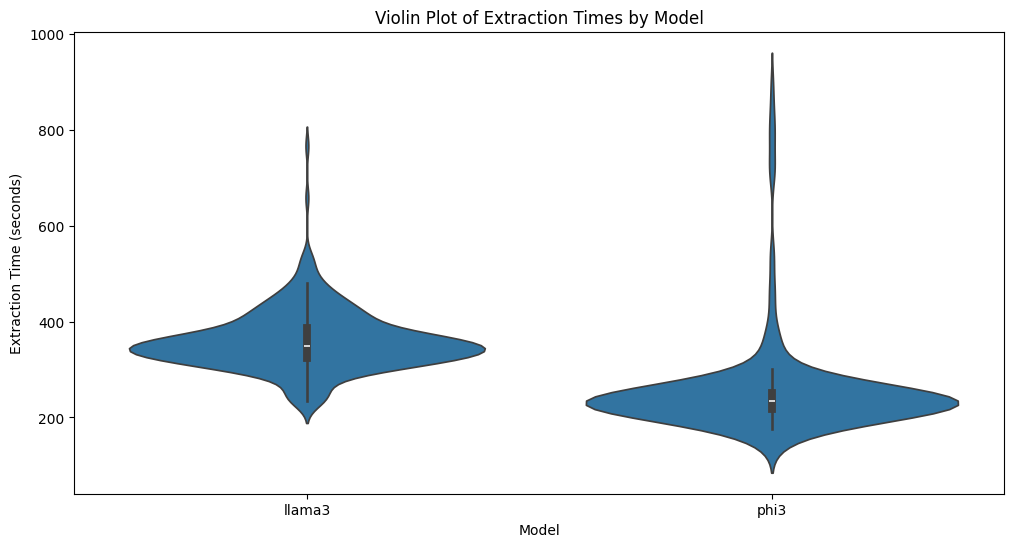

In [728]:
# Violin plot of extraction times
plt.figure(figsize=(12, 6))
sns.violinplot(x='model', y='time', data=data_outliers)
plt.title('Violin Plot of Extraction Times by Model')
plt.xlabel('Model')
plt.ylabel('Extraction Time (seconds)')
plt.show()

In [729]:
# Display the time statistics by model
model_time_stats

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
llama3,300.0,361.843767,77.559021,228.47,324.740,349.880,387.9850,1149.78
phi3,300.0,263.434667,153.658285,149.60,218.185,233.415,252.0775,1902.61


In [730]:
# Calculate dispersion measures for extraction times

# Separate data by model
llama3_times = data[data['model'] == 'llama3']['time']
phi3_times = data[data['model'] == 'phi3']['time']

# Range
range_llama3 = llama3_times.max() - llama3_times.min()
range_phi3 = phi3_times.max() - phi3_times.min()

# Variance
variance_llama3 = llama3_times.var()
variance_phi3 = phi3_times.var()

# Standard Deviation
std_dev_llama3 = llama3_times.std()
std_dev_phi3 = phi3_times.std()

# Interquartile Range (IQR)
iqr_llama3 = llama3_times.quantile(0.75) - llama3_times.quantile(0.25)
iqr_phi3 = phi3_times.quantile(0.75) - phi3_times.quantile(0.25)

# Create a summary dataframe
dispersion_measures = pd.DataFrame({
    'Measure': ['Range', 'Variance', 'Standard Deviation', 'IQR'],
    'Llama3': [range_llama3, variance_llama3, std_dev_llama3, iqr_llama3],
    'Phi-3': [range_phi3, variance_phi3, std_dev_phi3, iqr_phi3]
})

dispersion_measures

,Measure,Llama3,Phi-3
0,Range,921.310000,1753.010000
1,Variance,6015.401744,23610.868502
2,Standard Deviation,77.559021,153.658285
3,IQR,63.245000,33.892500


**Interpretation**
- Range: Phi-3 shows a wider range in extraction times, indicating greater variability in extreme times.
- Variance and Standard Deviation: Phi-3 also has significantly higher variance and standard deviation compared to Llama3, confirming that Phi-3's extraction times are more dispersed.
- IQR: Interestingly, the IQR of Llama3 is higher than that of Phi-3, suggesting that the dispersion in the central 50% of the data is greater for Llama3.

In [731]:
from scipy.stats import shapiro, normaltest, anderson

# Shapiro-Wilk test for normal distribution
shapiro_llama3 = shapiro(data[data['model'] == 'llama3']['time'])
shapiro_phi3 = shapiro(data[data['model'] == 'phi3']['time'])

# Display test results
shapiro_results = {
    'llama3': {'Statistic': shapiro_llama3[0], 'p-value': shapiro_llama3[1]},
    'phi3': {'Statistic': shapiro_phi3[0], 'p-value': shapiro_phi3[1]}
}

shapiro_results


{'llama3': {'Statistic': np.float64(0.7307294123536073),
  'p-value': np.float64(9.952835875786658e-22)},
 'phi3': {'Statistic': np.float64(0.3750818608150688),
  'p-value': np.float64(8.1470370988751e-31)}}

No siguen una normal ninguno de los dos

In [732]:
from scipy.stats import ks_2samp

# Perform the Kolmogorov-Smirnov test to compare the time distributions between the two models
ks_test_result = ks_2samp(data[data['model'] == 'llama3']['time'], data[data['model'] == 'phi3']['time'])

# Display test results
ks_test_result


KstestResult(statistic=np.float64(0.8233333333333334), pvalue=np.float64(5.66990990078276e-103), statistic_location=np.float64(283.41), statistic_sign=np.int8(-1))

pvalor p-valor: $4.06*10^-54$ La prueba de Kolmogorov-Smirnov sugiere que los tiempos de extracción para los modelos llama3 y phi3 no siguen la misma distribución.

In [733]:
from scipy.stats import mannwhitneyu

# Perform the Wilcoxon-Mann-Whitney test to compare the medians of extraction times between the two models
wilcoxon_result = mannwhitneyu(data[data['model'] == 'llama3']['time'], data[data['model'] == 'phi3']['time'], alternative='two-sided')

# Display test results
wilcoxon_result


MannwhitneyuResult(statistic=np.float64(82471.0), pvalue=np.float64(1.034573050728277e-69))

p-valor: $2.41*10^-36$ La prueba de Wilcoxon-Mann-Whitney sugiere que las medianas de los tiempos de extracción para los modelos llama3 y phi3 son significativamente diferentes

In [734]:
from scipy.stats import kruskal

# Perform the Kruskal-Wallis test to compare the medians of extraction times between the two models
kruskal_result = kruskal(data[data['model'] == 'llama3']['time'], data[data['model'] == 'phi3']['time'])

# Display test results
kruskal_result


KruskalResult(statistic=np.float64(311.4977599595762), pvalue=np.float64(1.0302681217244865e-69))

La prueba de Kruskal-Wallis sugiere que las medianas de los tiempos de extracción para los modelos llama3 y phi3 son significativamente diferentes

In [735]:
# How faster is phi3 on average
phi3_mean = data[data['model'] == 'phi3']['time'].mean()
llama3_mean = data[data['model'] == 'llama3']['time'].mean()

speedup = (llama3_mean - phi3_mean) / llama3_mean * 100
print(f"phi3 is {speedup:.2f}% faster on average compared to llama3")

phi3 is 27.20% faster on average compared to llama3


In [736]:
# Count the number of None values for each model and column
none_counts = data.isna().groupby(data['model']).sum()

# Display the result
none_counts

,pdf,mm_yyyy,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time
model,,,,,,,,,,,
llama3,0,0,61,26,26,13,1,31,31,0,0
phi3,0,0,2,0,0,3,0,32,32,0,0


In [737]:
# Count number of rows with None values for each model
none_counts = data.isna().groupby(data['model']).sum()
# Display the result
none_counts

,pdf,mm_yyyy,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time
model,,,,,,,,,,,
llama3,0,0,61,26,26,13,1,31,31,0,0
phi3,0,0,2,0,0,3,0,32,32,0,0


In [738]:
data['model'].value_counts()

model
llama3    300
phi3      300
Name: count, dtype: int64

In [739]:
# Calcular el total de filas por modelo
total_rows_per_model = data['model'].value_counts()

# Calcular el porcentaje de 'None' por cada modelo y columna
none_percentage = (none_counts.div(total_rows_per_model, axis=0)) * 100

# Redondear a dos decimales
none_percentage = none_percentage.round(2)

# Mostrar el resultado
none_percentage

,pdf,mm_yyyy,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time
model,,,,,,,,,,,
llama3,0.0,0.0,20.33,8.67,8.67,4.33,0.33,10.33,10.33,0.0,0.0
phi3,0.0,0.0,0.67,0.00,0.00,1.00,0.00,10.67,10.67,0.0,0.0


In [740]:
import scipy.stats as stats

# Calculate the amount of None values per model
none_counts = data.isna().groupby(data['model']).sum()

# Add a column with the total None per model
none_counts['total_None'] = none_counts.sum(axis=1)

# Extract the total None counts for each model
llama3_none_count = none_counts.loc['llama3', 'total_None']
phi3_none_count = none_counts.loc['phi3', 'total_None']

# Create the contingency table with calculated values
contingency_table = pd.DataFrame({
    'None': [llama3_none_count, phi3_none_count],  # Total 'None' values for 'llama3' and 'phi3'
    'No None': [data['model'].value_counts()['llama3'] - llama3_none_count, 
                data['model'].value_counts()['phi3'] - phi3_none_count]  # Total non-None values for 'llama3' and 'phi3'
}, index=['llama3', 'phi3'])

# Print the contingency table to verify
print(contingency_table)

# Realizar la prueba chi-cuadrado
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

# Resultados
print(chi2_stat)
print(f"pvalue is: {p_val}")
print(f"dof is: {dof}")
print(contingency_table)
print(ex)

        None  No None
llama3   189      111
phi3      69      231
96.29402964776281
pvalue is: 9.902821150375335e-23
dof is: 1
        None  No None
llama3   189      111
phi3      69      231
[[129. 171.]
 [129. 171.]]


The extremely low p-value signifies that the differences observed in the number of "None" values between llama3 and phi3 are not due to random variation, but rather indicate a real discrepancy between the models. Specifically, llama3 produces a significantly higher proportion of "None" values compared to phi3, suggesting a possible performance issue or difference in how these models handle the extraction task.

In [741]:
def add_none_count_column(df):
    """
    Adds a new column to the DataFrame that contains the number of None values in each row.

    Args:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The DataFrame with an additional column for the count of None values in each row.
    """
    df['None_Count'] = df.isnull().sum(axis=1)
    return df

# Add a new column for the count of None values in each row
data_with_none_count = add_none_count_column(data)
data_with_none_count.head()

,pdf,mm_yyyy,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time,None_Count
0,BOE-B-2017-3514.pdf,01-2017,Alavés Montajes y Realización S.L.,1016400.00,euros,Agència Valenciana del Turisme,Contrato Mixto,Urgente,Negociado sin publicidad,llama3,404.64,0
1,BOE-B-2017-240.pdf,01-2017,International Business Machines S.A. (I.B.M.),3921166.68,euros,Diputación Foral de Álava,Contrato de suministro,Anticipada,Negociado sin publicidad por razones de exclus...,llama3,411.99,0
2,BOE-B-2017-2859.pdf,01-2017,Integra Mantenimiento Gestión y Servicios Inte...,440618.45,euros,Ayuntamiento de Madrid. Área de Gobierno de Eq...,Servicios,Ordinaria,Abierto,llama3,352.15,0
3,BOE-B-2017-470.pdf,01-2017,Teknoservice S.L.,1011150.00,euros,Consejería de Educación y Universidades del Go...,Suministro,Ordinaria,Abierto,llama3,368.93,0
4,BOE-B-2017-4174.pdf,01-2017,Econocom Osiatis S.A.,360000.00,euros,Ayuntamiento de Vitoria-Gasteiz,Servicio,Normal,Abierto,llama3,414.85,0


In [742]:
# Extract the total None counts for each model
llama3_none_count = none_counts.loc['llama3', 'total_None']
phi3_none_count = none_counts.loc['phi3', 'total_None']

print(f"Total None counts for Llama3 model: {llama3_none_count}")
print(f"Total None counts for Phi3 model: {phi3_none_count}")

Total None counts for Llama3 model: 189
Total None counts for Phi3 model: 69
